# EDA

## Install Required Packages

In [1]:
pip install pandas numpy matplotlib sklearn seaborn 

Note: you may need to restart the kernel to use updated packages.


## Import Packages

In [34]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [35]:
df = pd.read_csv('../data/2023_PM25.csv', delimiter=';')

## Clean Data

In [36]:
# remove the data error �
df = df.replace({'�': ''}, regex=True)

# conver begindatumtijd to a datetime format
df['Begindatumtijd'] = pd.to_datetime(df['Begindatumtijd'])


In [5]:
df

Component Bep.periode Eenheid            Begindatumtijd  \
0        PM2.5         uur     g/m 2023-01-01 00:00:00+01:00   
1        PM2.5         uur     g/m 2023-01-01 01:00:00+01:00   
2        PM2.5         uur     g/m 2023-01-01 02:00:00+01:00   
3        PM2.5         uur     g/m 2023-01-01 03:00:00+01:00   
4        PM2.5         uur     g/m 2023-01-01 04:00:00+01:00   
...        ...         ...     ...                       ...   
8755     PM2.5         uur     g/m 2023-12-31 19:00:00+01:00   
8756     PM2.5         uur     g/m 2023-12-31 20:00:00+01:00   
8757     PM2.5         uur     g/m 2023-12-31 21:00:00+01:00   
8758     PM2.5         uur     g/m 2023-12-31 22:00:00+01:00   
8759     PM2.5         uur     g/m 2023-12-31 23:00:00+01:00   

                  Einddatumtijd  NL01485  NL01487  NL01488  NL01489  NL01491  \
0     2023-01-01T01:00:00+01:00    103.1    103.9    102.0     23.6     70.7   
1     2023-01-01T02:00:00+01:00     30.5     30.6     33.7     18.0     28.4   
2     2023-01-01T03:00:00+01:00     12.2     13.8     14.0      9.2     12.6   
3     2023-01-01T04:00:00+01:00      7.9      8.3      8.6      7.3      8.4   
4     2023-01-01T05:00:00+01:00      6.4      6.0      6.5      6.3      6.0   
...                         ...      ...      ...      ...      ...      ...   
8755  2023-12-31T20:00:00+01:00     12.0     10.8     13.0      4.9      8.6   
8756  2023-12-31T21:00:00+01:00     10.2     10.0     10.6      3.9      8.5   
8757  2023-12-31T22:00:00+01:00     11.4     10.6      8.6      3.6      9.2   
8758  2023-12-31T23:00:00+01:00     11.3     11.7      9.0      3.9     10.0   
8759  2024-01-01T00:00:00+01:00     11.7     16.2     14.1      5.4     11.5   

      ...  NL49553  NL49556  NL49557  NL49561  NL49570  NL49572  NL49573  \
0     ...     53.0    126.7     15.9     82.7     84.8    162.6     12.0   
1     ...     18.6     16.5     21.7     95.9     18.7     17.8     18.4   
2     ...     13.8     13.5     10.9     30.7     15.8      NaN     17.0   
3     ...     13.0     14.0     11.9     13.1     14.3      7.7     14.4   
4     ...     11.8     12.9     15.2     11.2     14.3      9.1     13.7   
...   ...      ...      ...      ...      ...      ...      ...      ...   
8755  ...     18.2      7.8     16.1      7.1     15.9     18.5     16.3   
8756  ...     17.0     10.8     22.5     59.7     37.6     20.3     18.5   
8757  ...     21.1     14.3     23.7      9.7     19.8     20.6     15.8   
8758  ...     22.2     11.0     26.9     11.2     28.2     35.1     21.5   
8759  ...     23.4      9.4     25.3     13.0     23.3     31.9     23.4   

      NL49701  NL49703  NL49704  
0        56.3     32.5     29.6  
1        39.4     36.4     34.4  
2        16.3     14.8     14.3  
3        10.2      9.6      9.5  
4         7.8      7.8      7.4  
...       ...      ...      ...  
8755      6.3      6.4      5.0  
8756      6.9      7.5      6.1  
8757      6.7      8.9      7.2  
8758      8.2     11.1      8.1  
8759     10.6      9.0      8.4  

[8760 rows x 58 columns]

In [59]:
df.mean()

C:\Users\stijn\AppData\Local\Temp\ipykernel_20848\3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()
C:\Users\stijn\AppData\Local\Temp\ipykernel_20848\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


NL01485     8.549154
NL01487     9.154367
NL01488     9.359516
NL01489     8.651766
NL01491     8.913054
NL01493     8.808044
NL01494     8.715136
NL01495     8.408421
NL01496     9.098530
NL01497     8.213559
NL01912     8.652578
NL01913     9.741614
NL10131     8.812582
NL10136     6.959472
NL10138     6.069493
NL10230     9.134680
NL10240     8.259482
NL10241     7.452683
NL10247    10.003329
NL10248    10.446633
NL10404     6.601120
NL10418     7.706499
NL10444     7.871688
NL10449     7.340108
NL10450     7.164409
NL10538     6.484185
NL10636     9.482360
NL10641     8.726133
NL10643     7.327593
NL10644     7.102795
NL10738     8.257063
NL10741     8.715039
NL10742     8.402350
NL10821     7.215092
NL10934     5.945671
NL10937     5.980859
NL10938     5.894275
NL49007     8.805107
NL49012     8.680789
NL49014     7.677496
NL49016     6.778789
NL49017     9.288733
NL49551     8.128339
NL49553     8.618525
NL49556     6.564314
NL49557     9.933270
NL49561     8.401897
NL49570     8

## Missing values

In [6]:
df.isnull().sum()

Component           0
Bep.periode         0
Eenheid             0
Begindatumtijd      0
Einddatumtijd       0
NL01485            12
NL01487            10
NL01488             9
NL01489            44
NL01491            10
NL01493            16
NL01494            23
NL01495            14
NL01496             6
NL01497           117
NL01912             9
NL01913             7
NL10131           194
NL10136           986
NL10138           760
NL10230           429
NL10240            99
NL10241           339
NL10247           343
NL10248           374
NL10404           549
NL10418           180
NL10444           315
NL10449           252
NL10450           438
NL10538           192
NL10636           221
NL10641           267
NL10643           321
NL10644           325
NL10738           310
NL10741           347
NL10742           141
NL10821           262
NL10934           512
NL10937           269
NL10938           187
NL49007           104
NL49012            78
NL49014           619
NL49016   

In [37]:
stations = []
for column in df.columns:
    if column.startswith('NL'):
        stations.append(column)

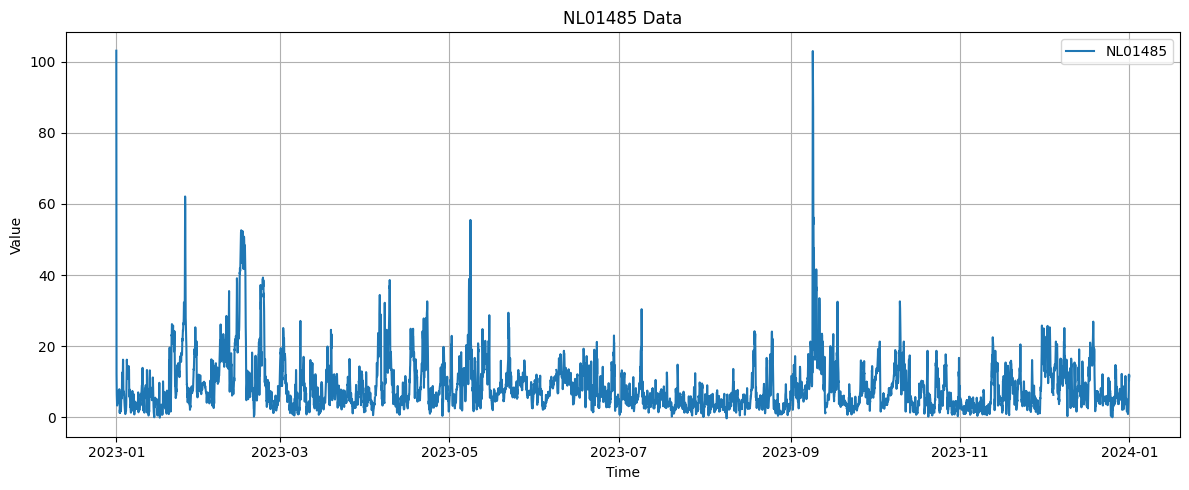

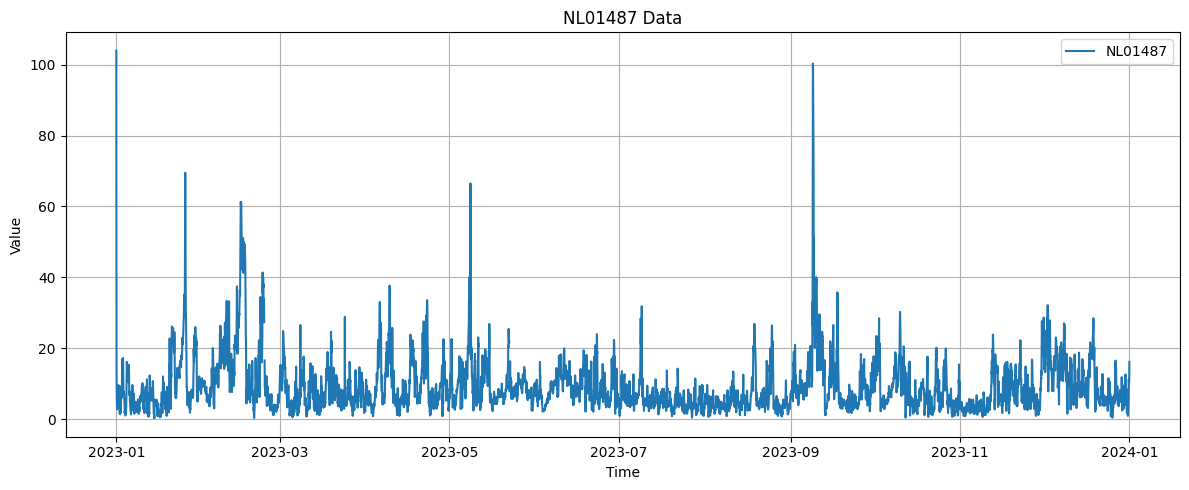

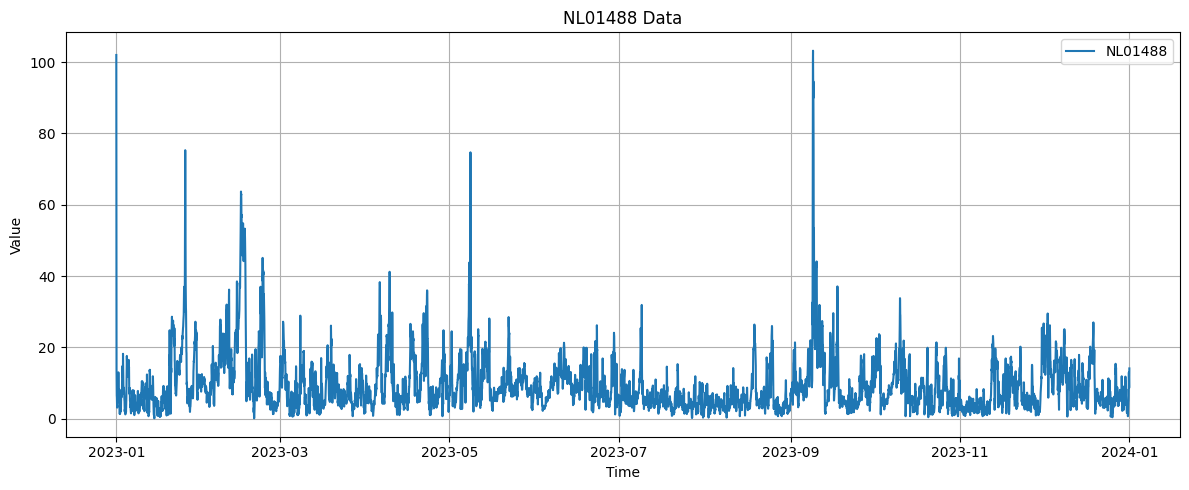

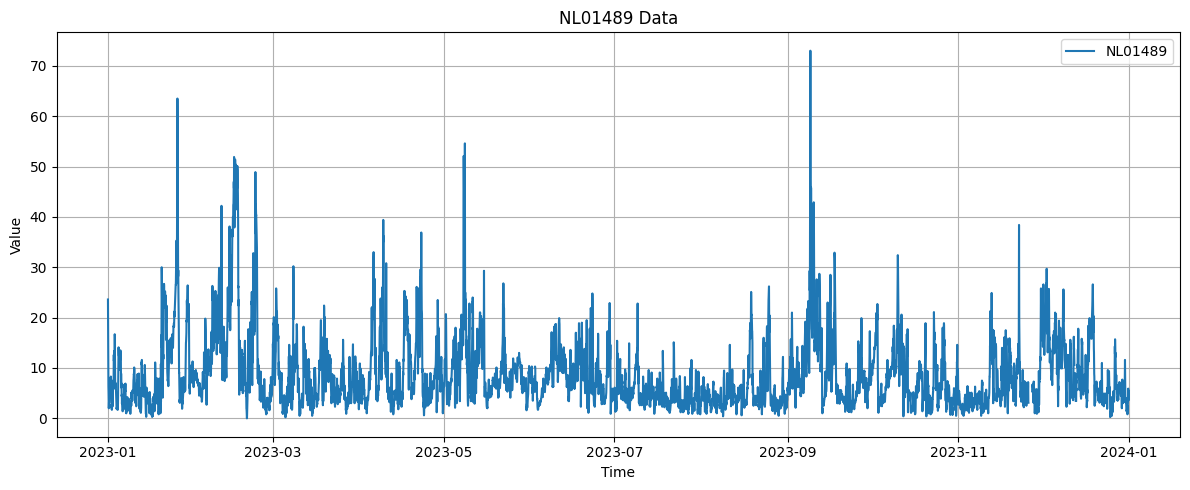

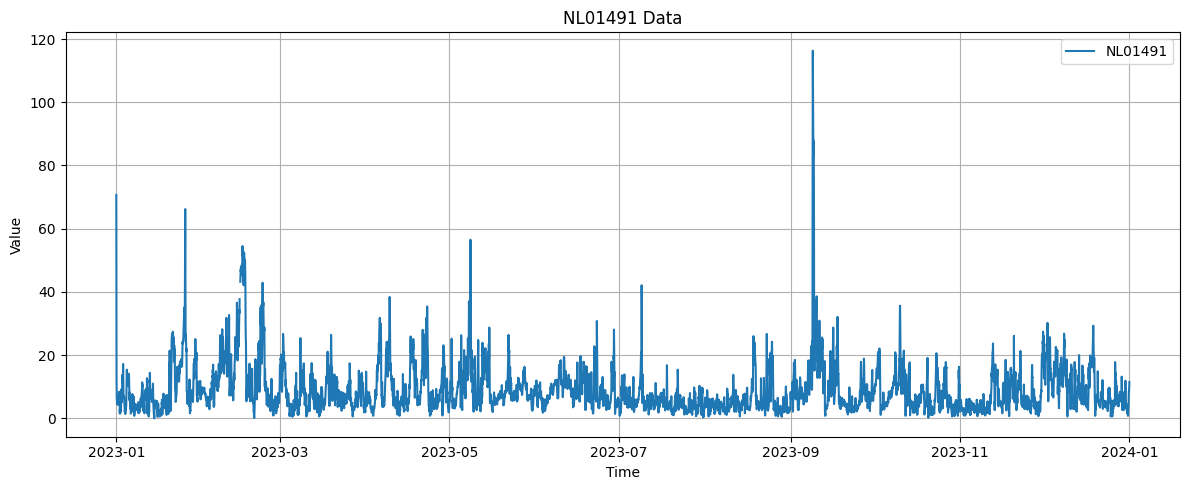

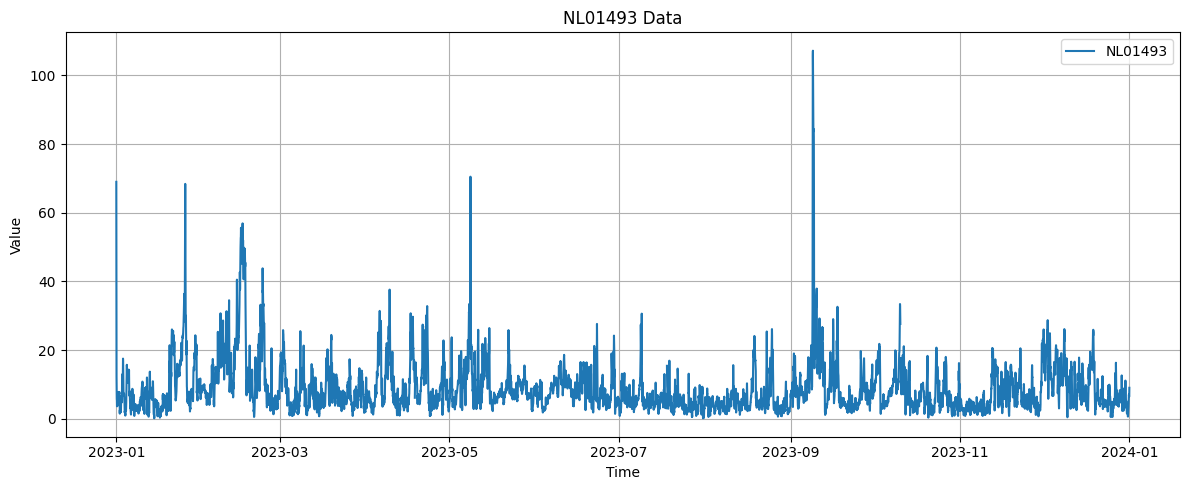

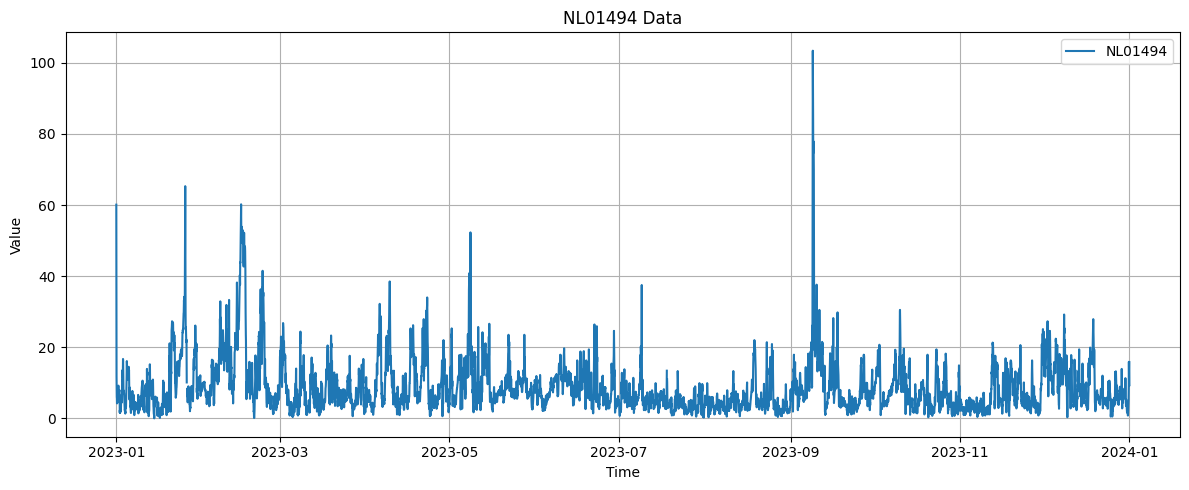

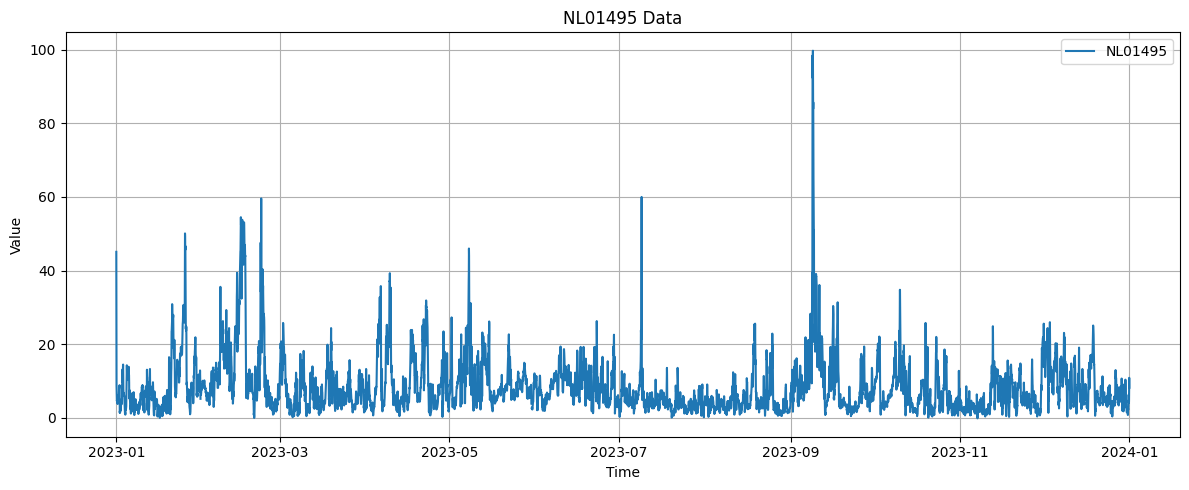

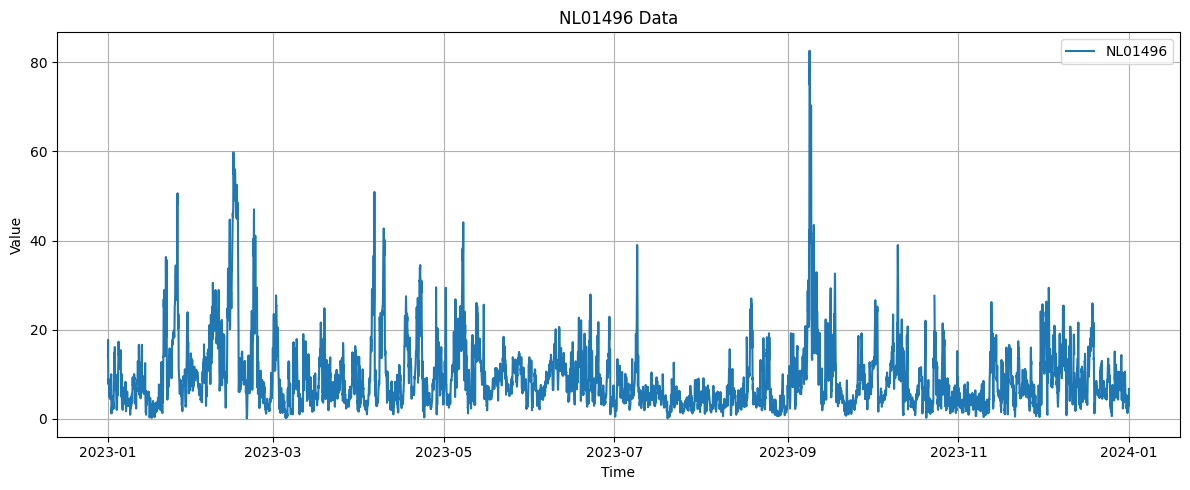

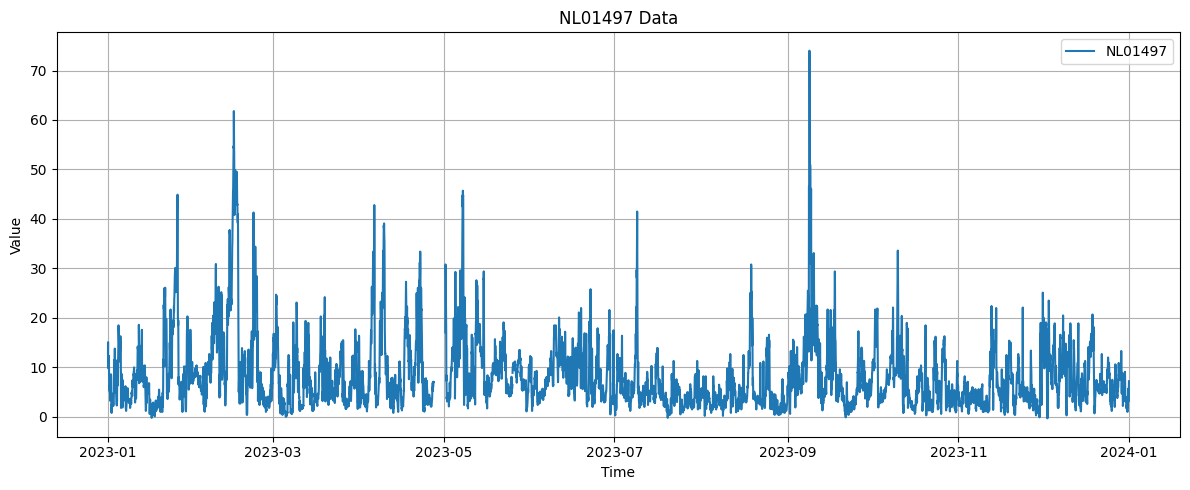

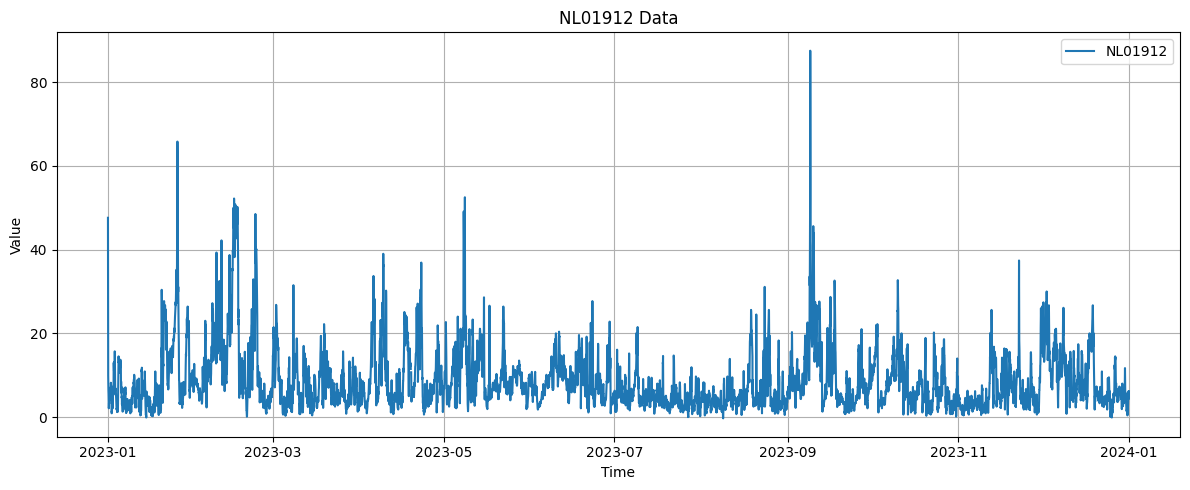

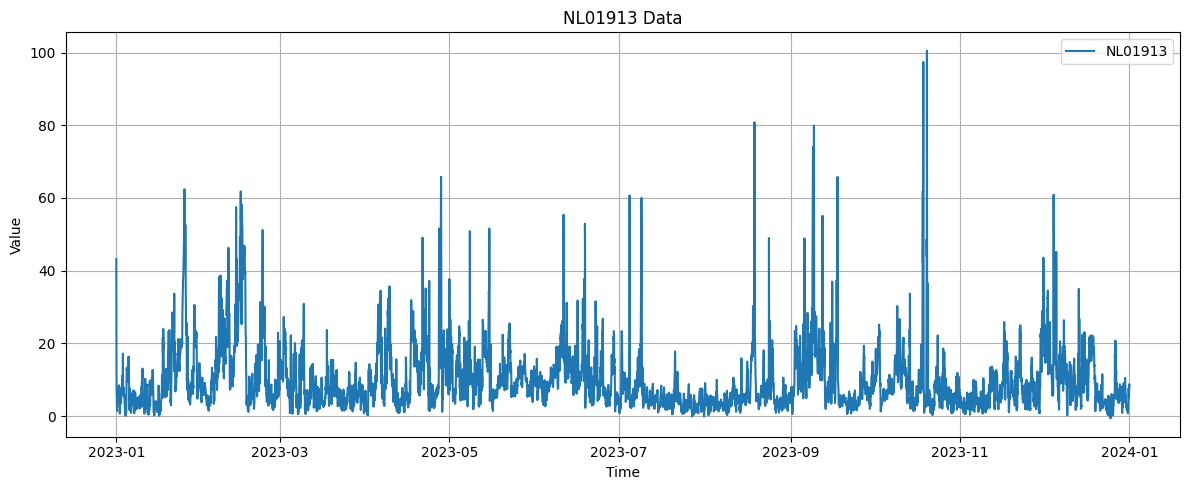

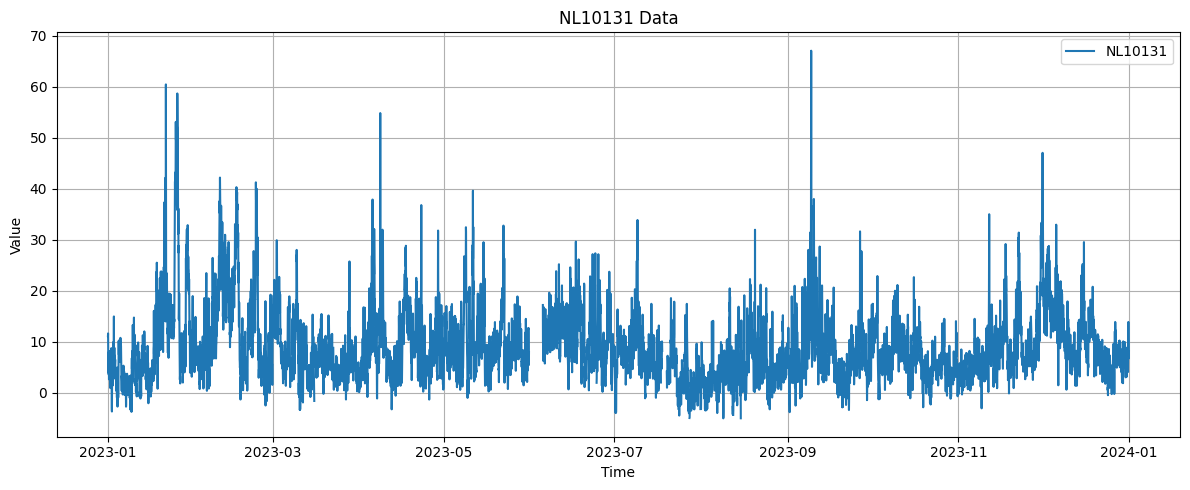

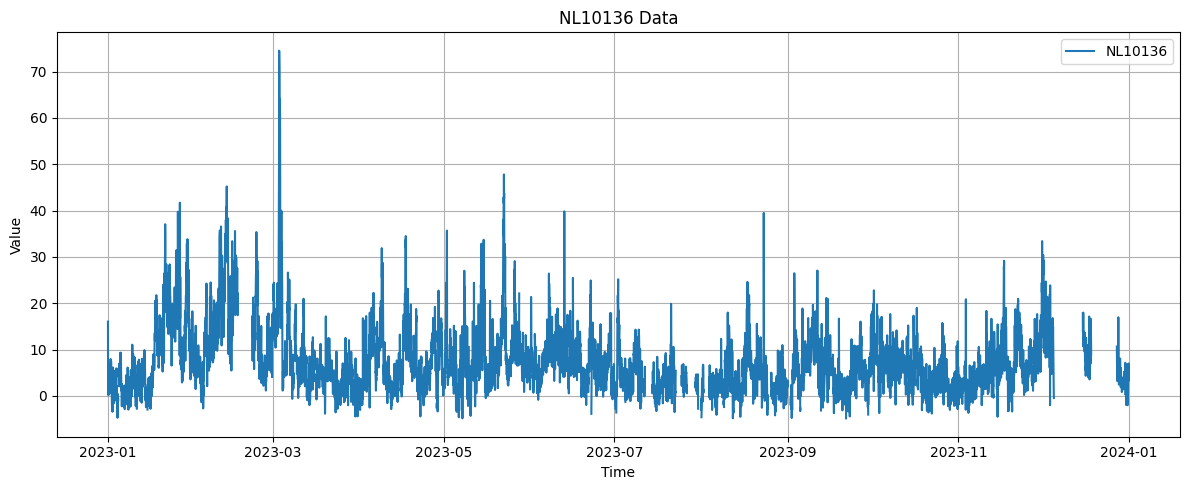

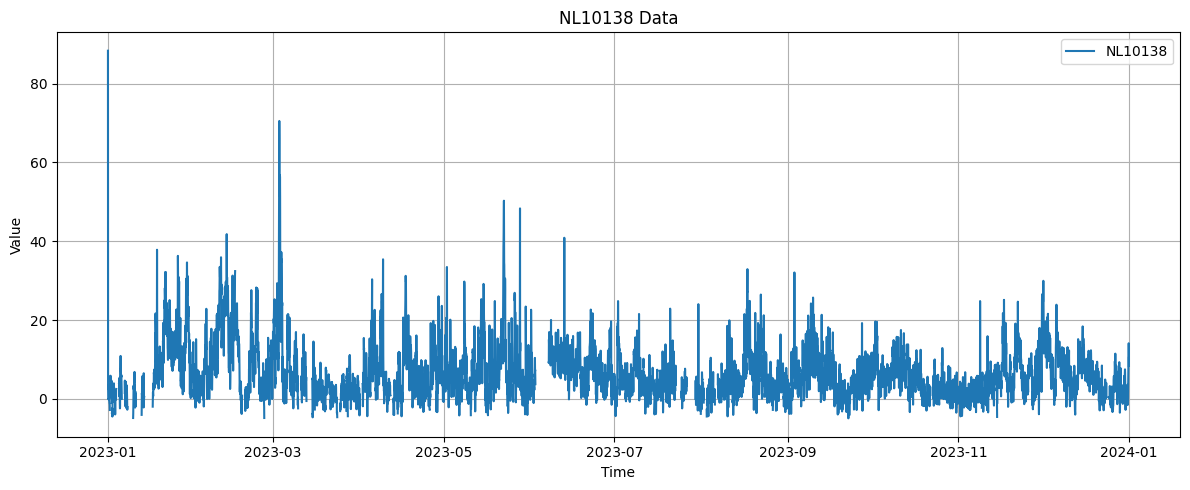

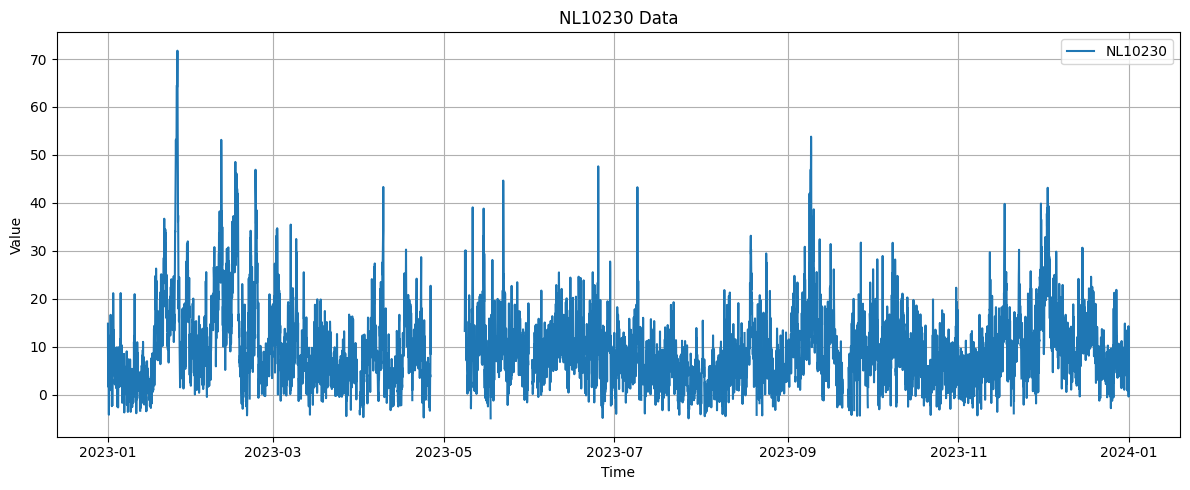

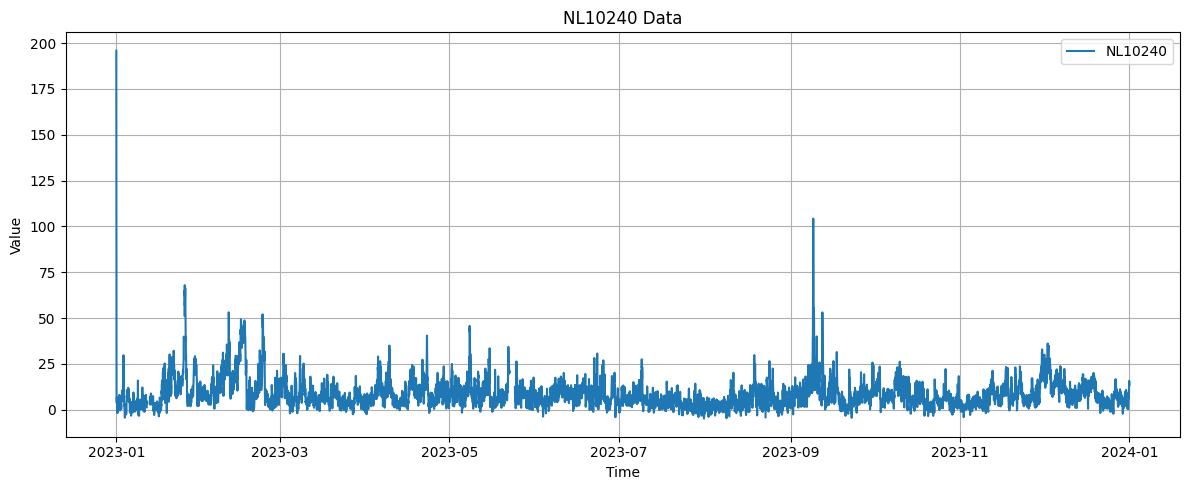

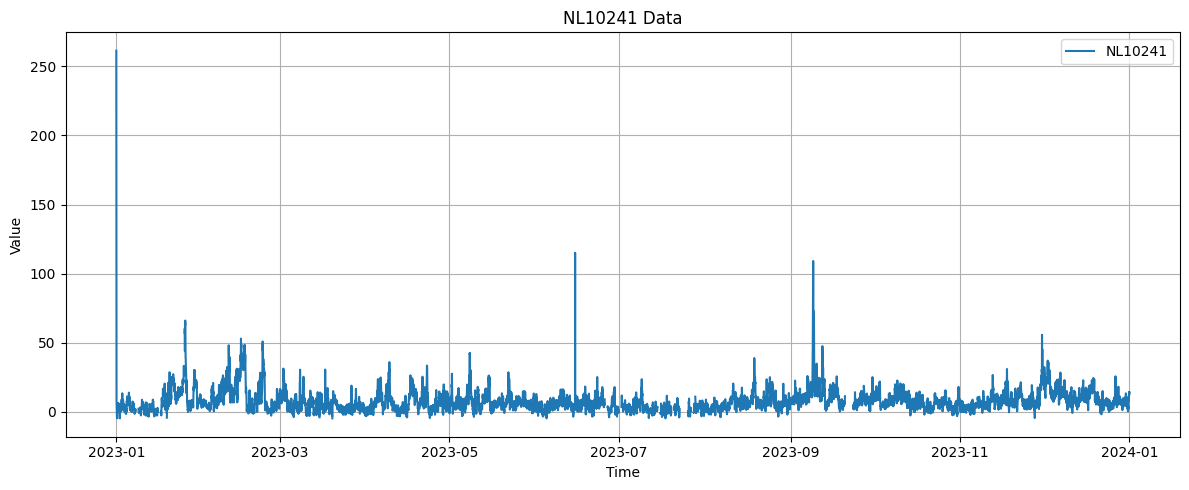

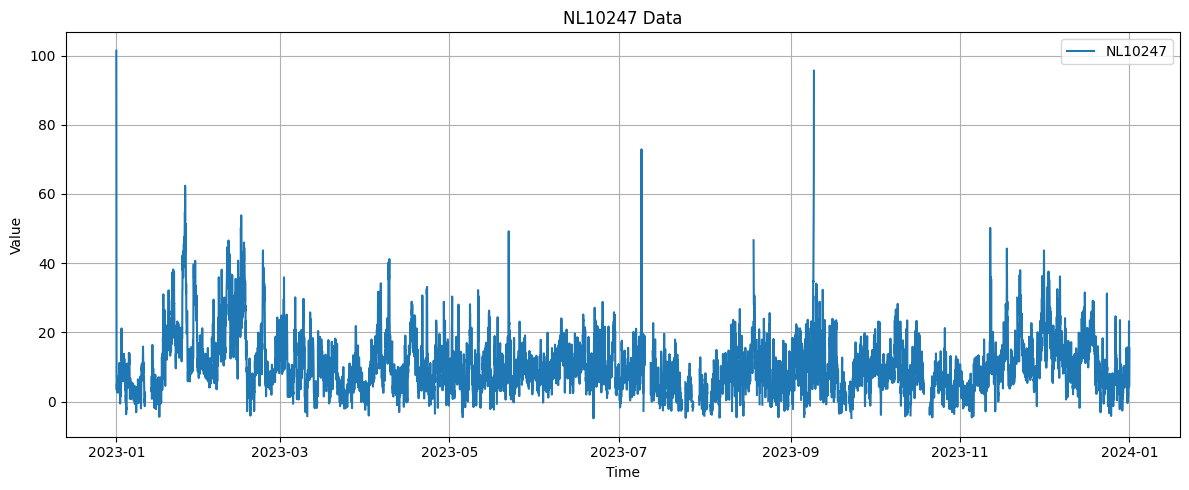

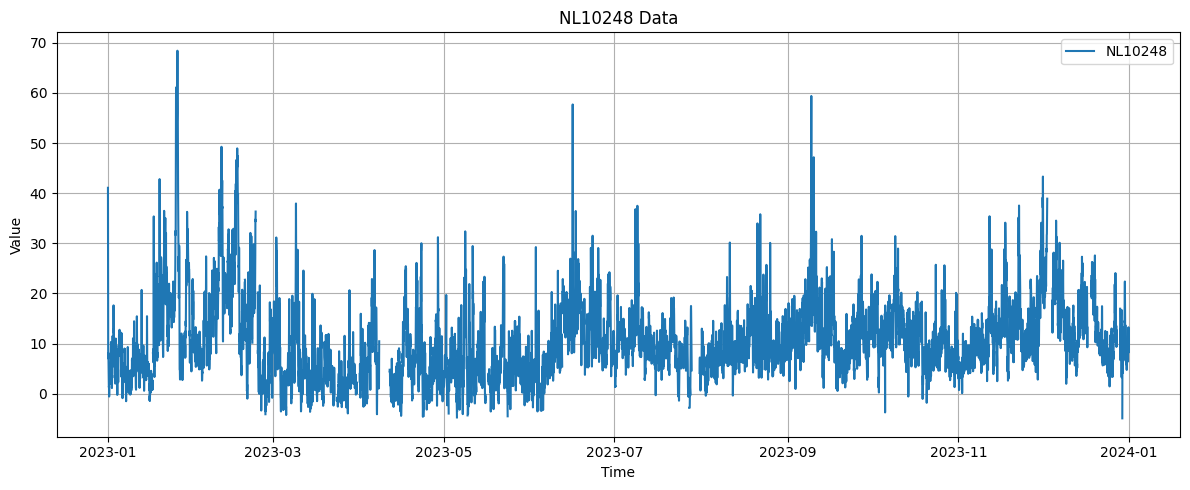

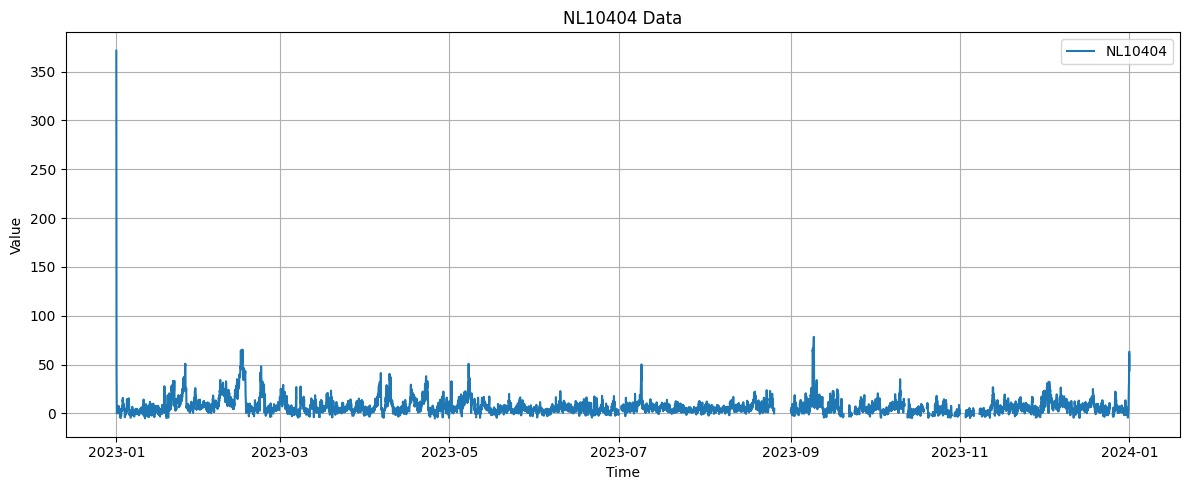

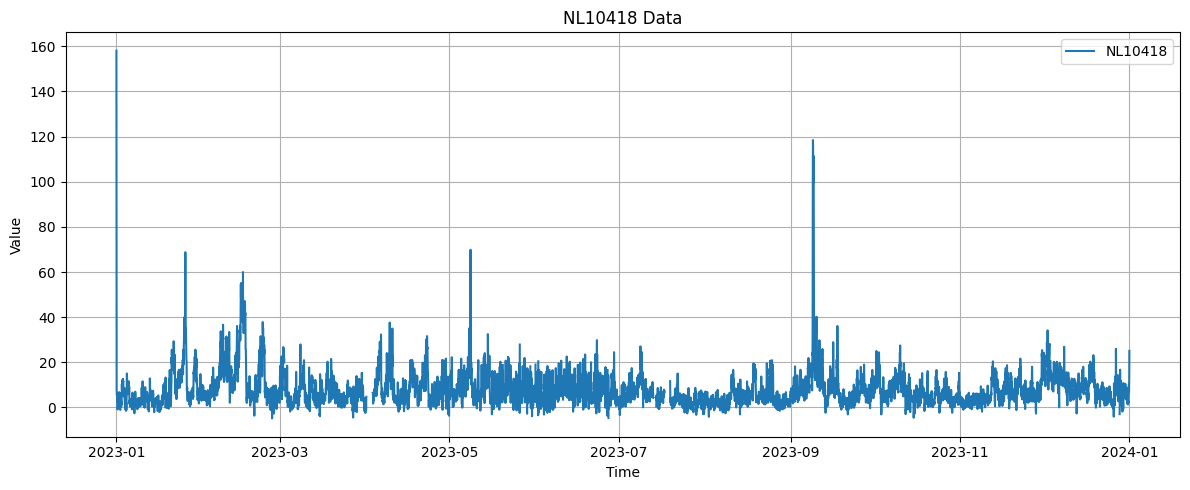

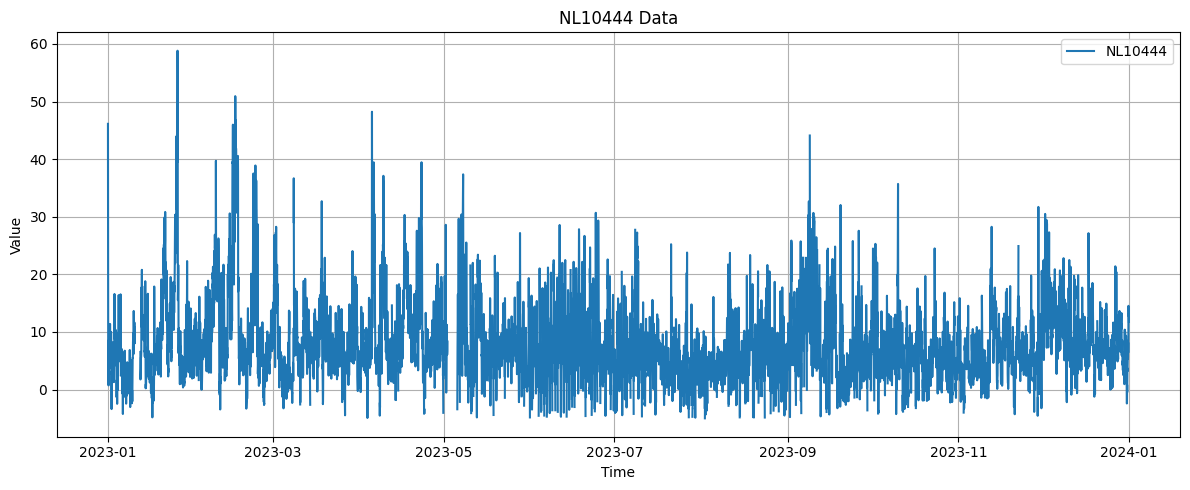

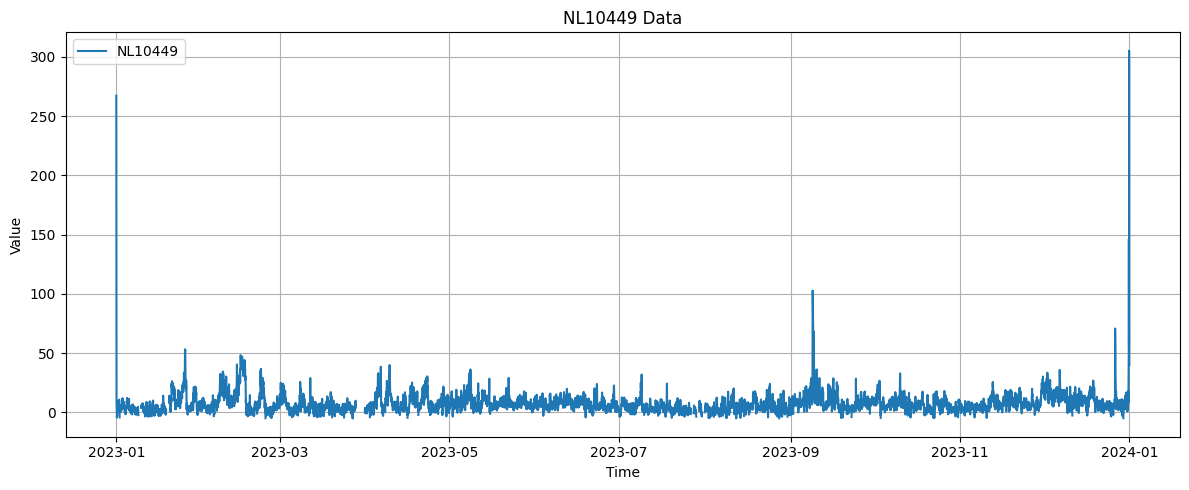

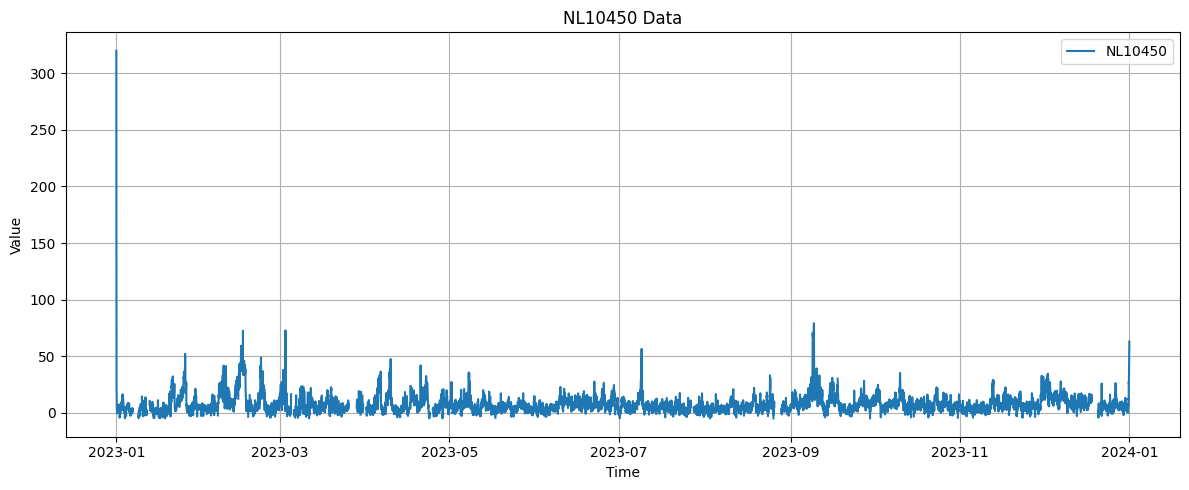

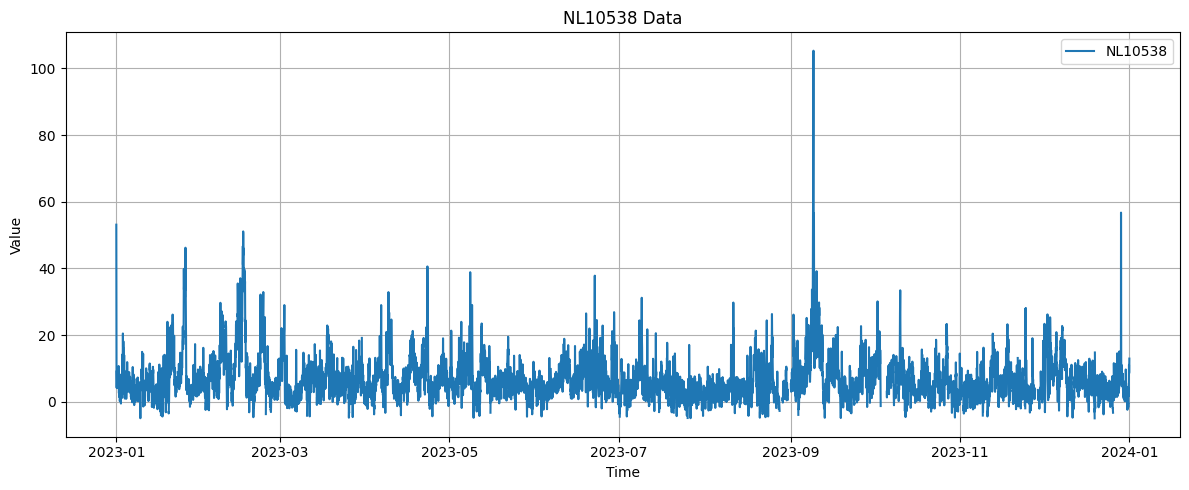

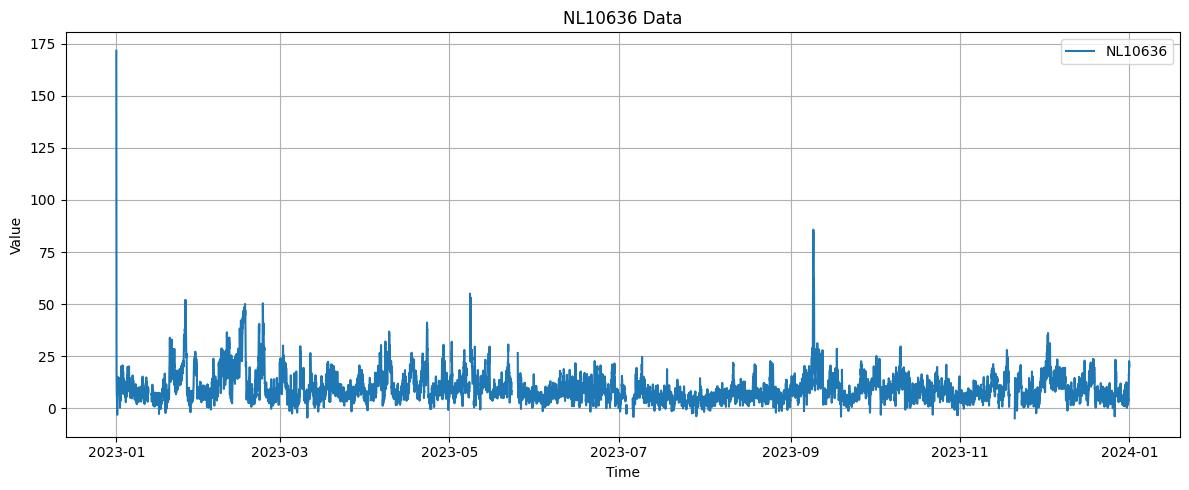

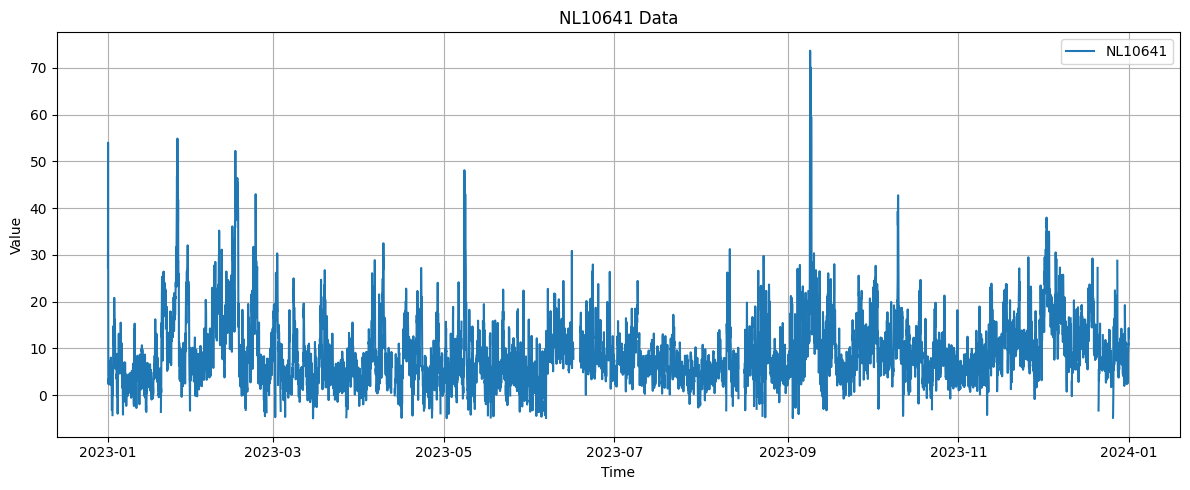

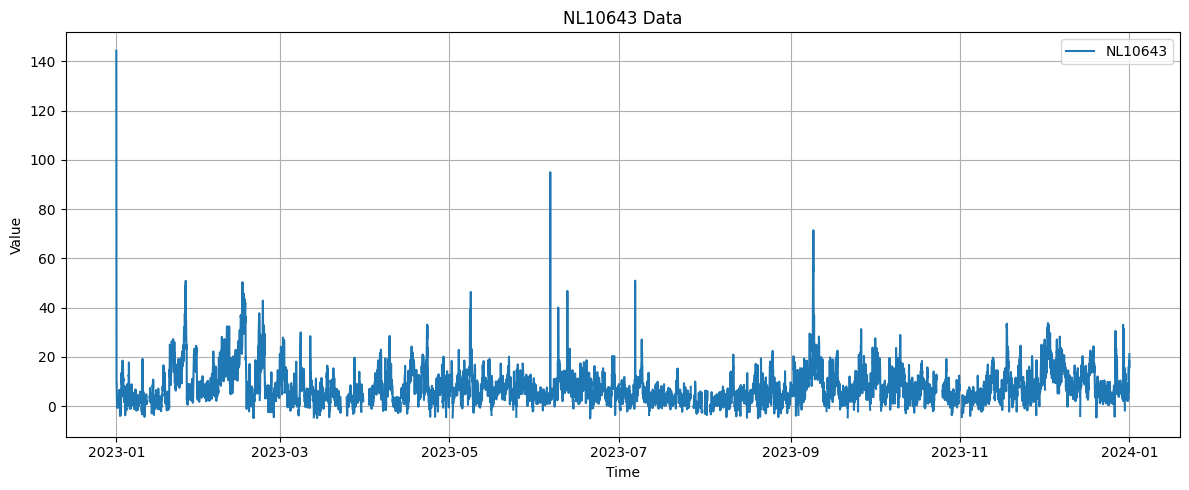

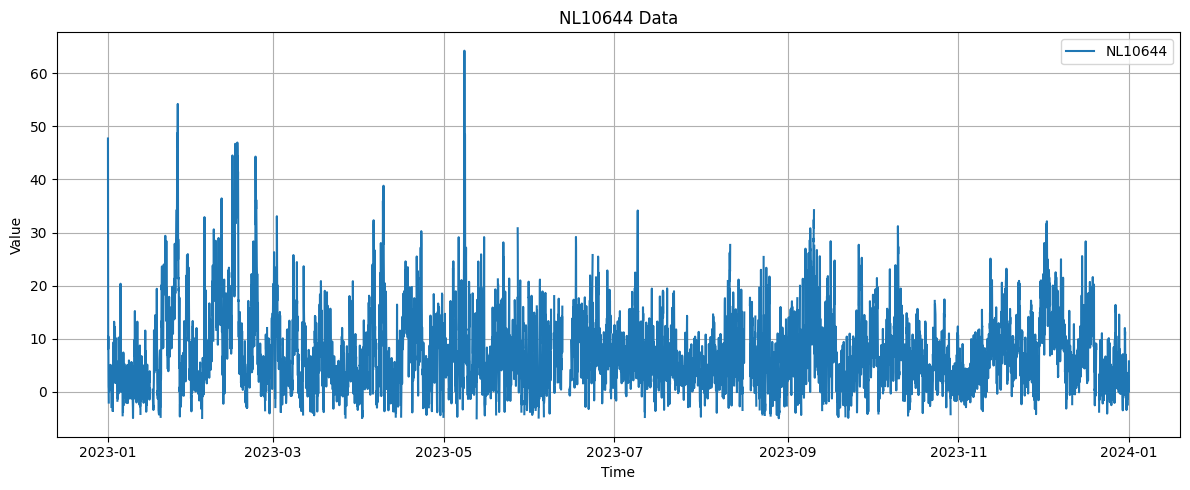

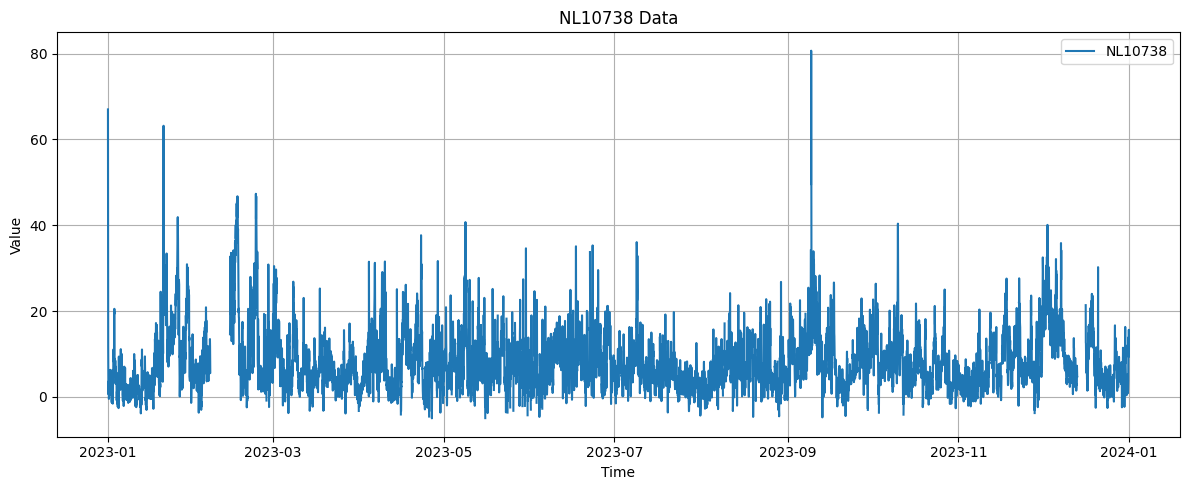

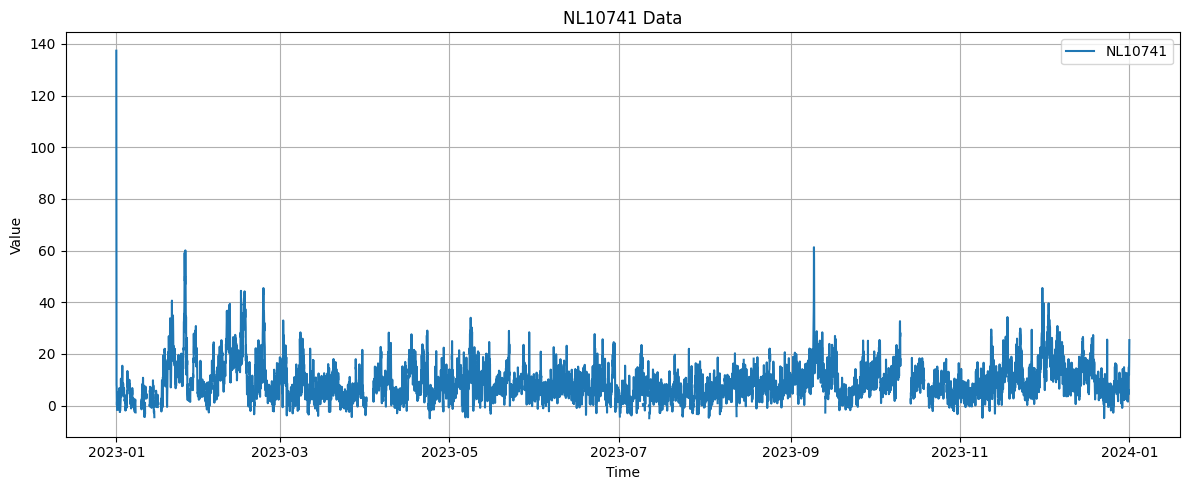

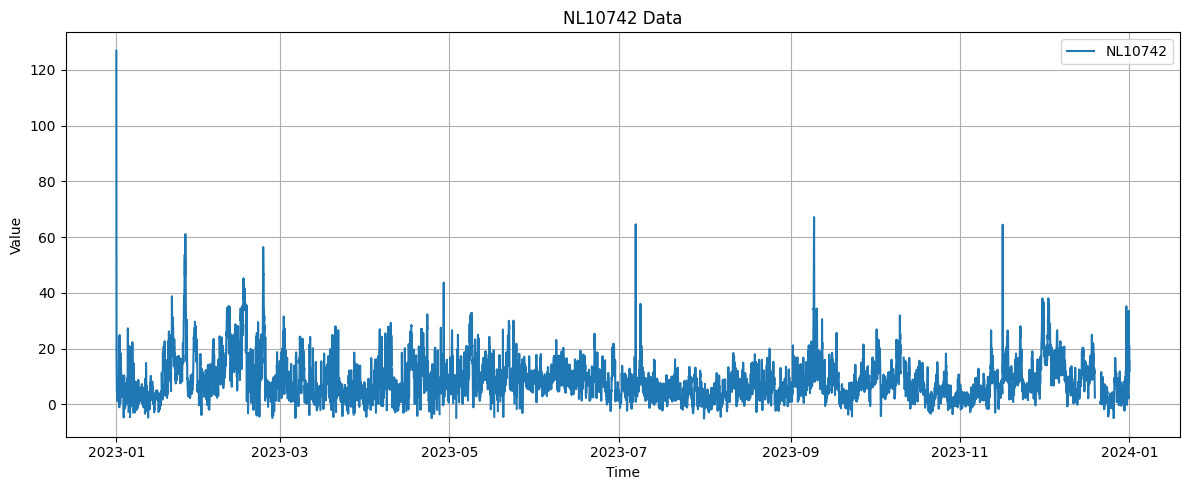

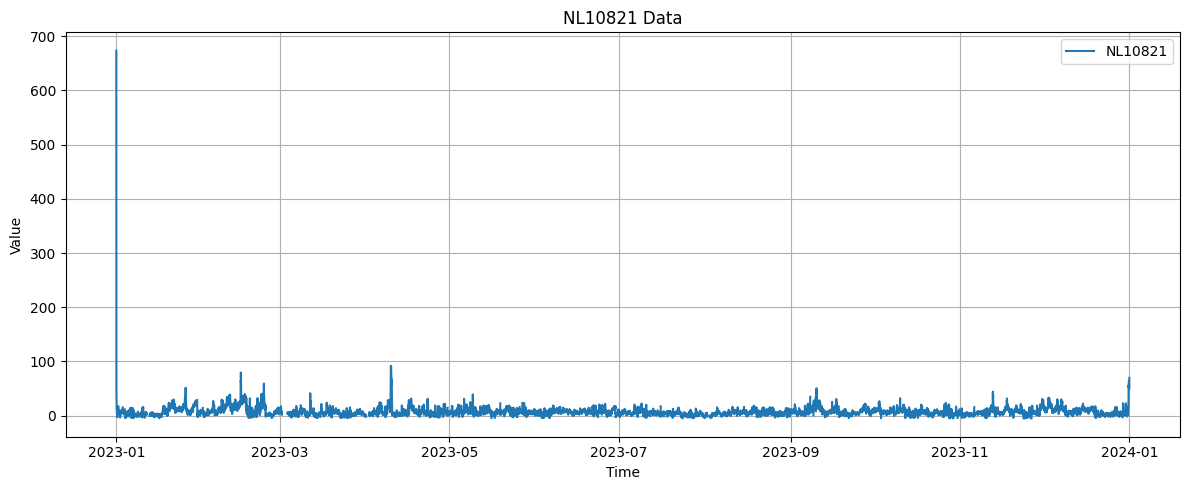

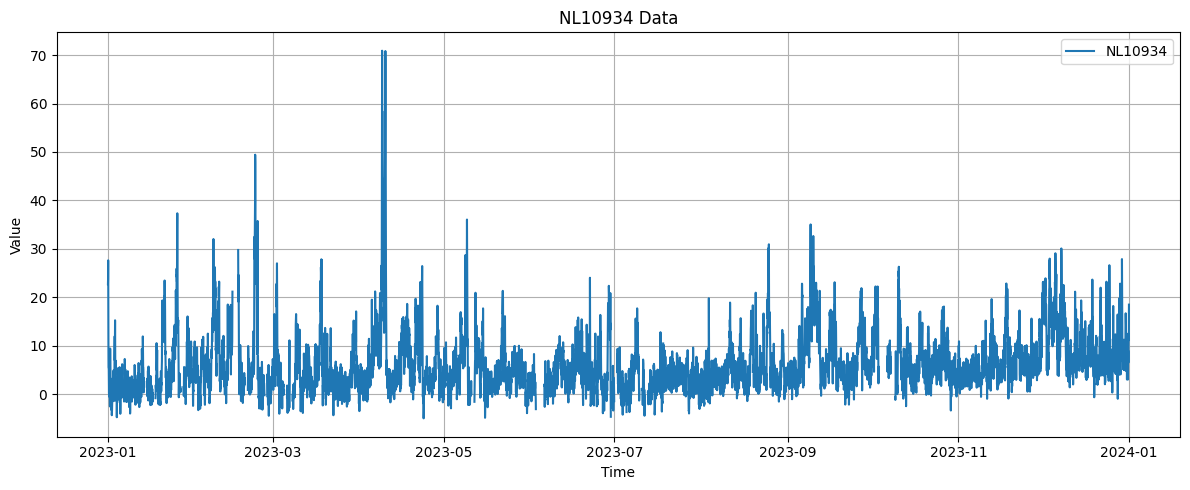

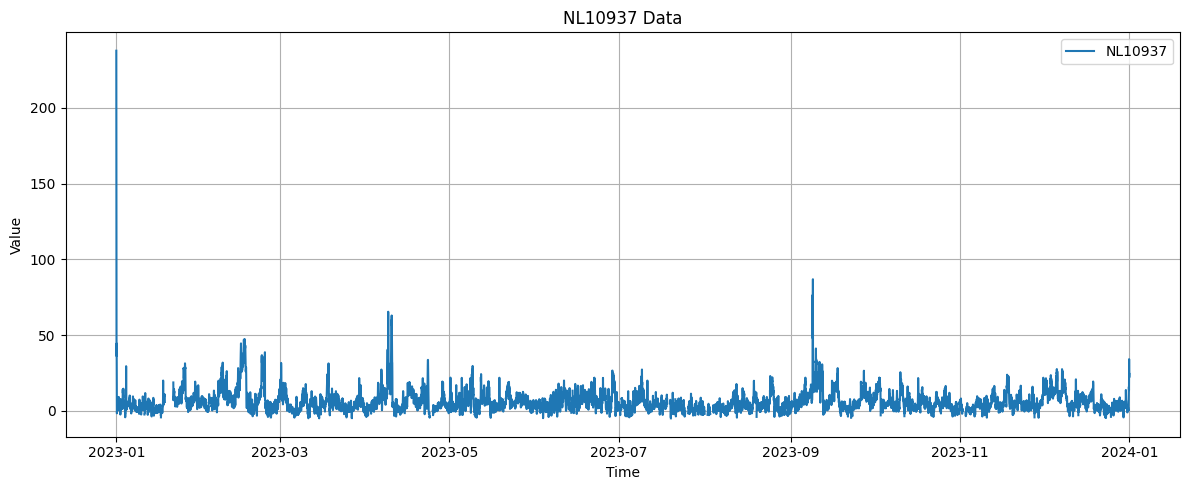

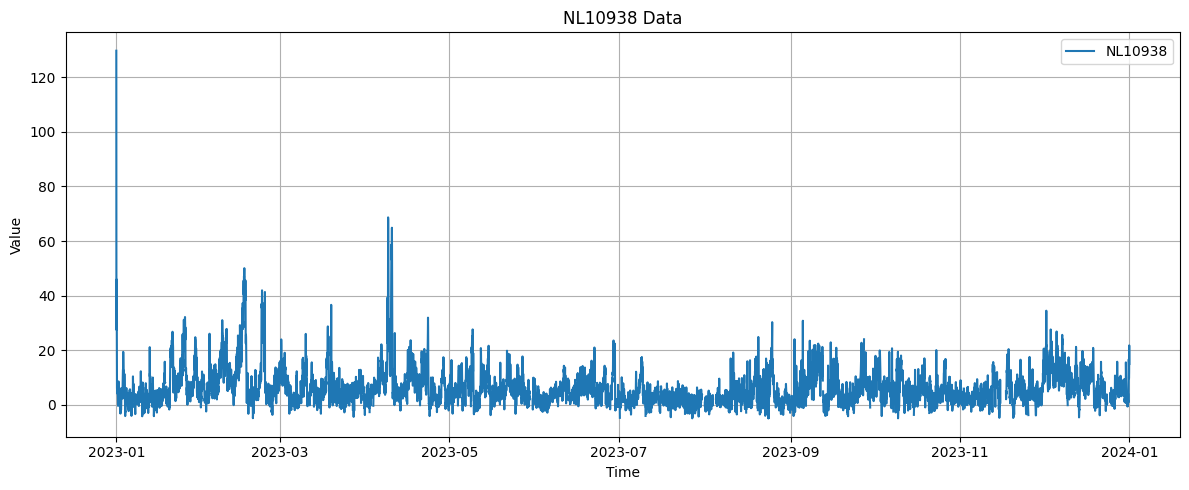

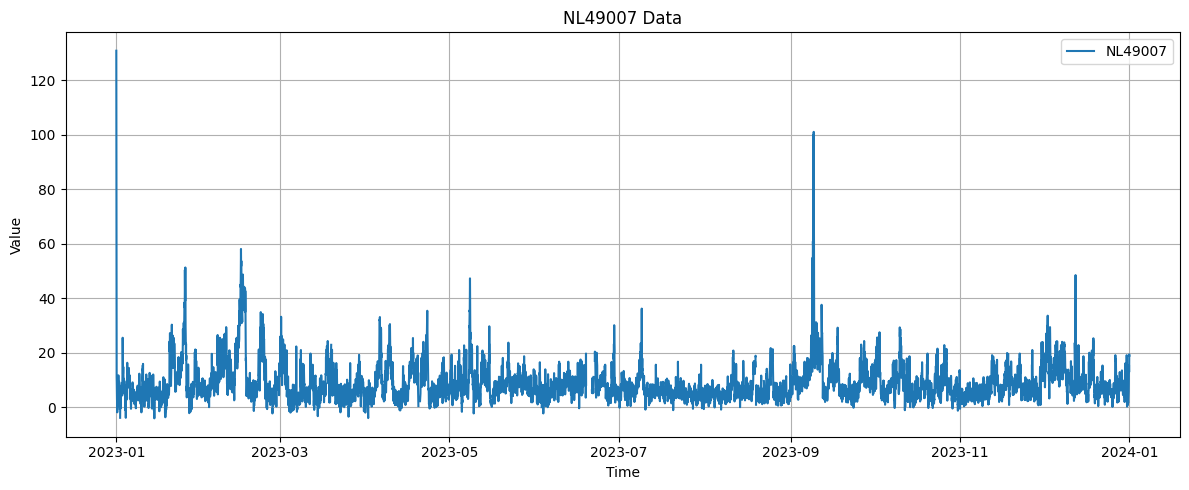

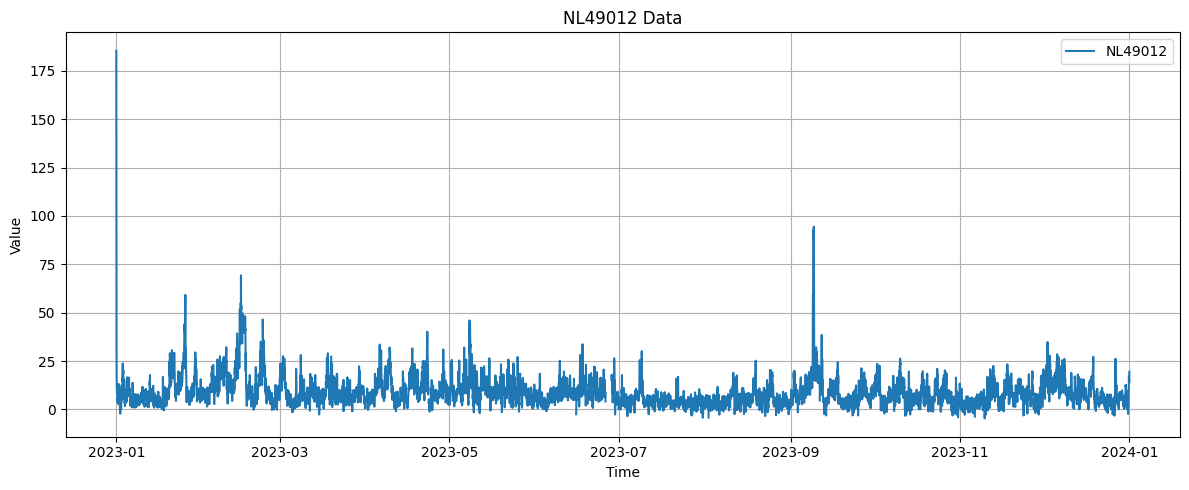

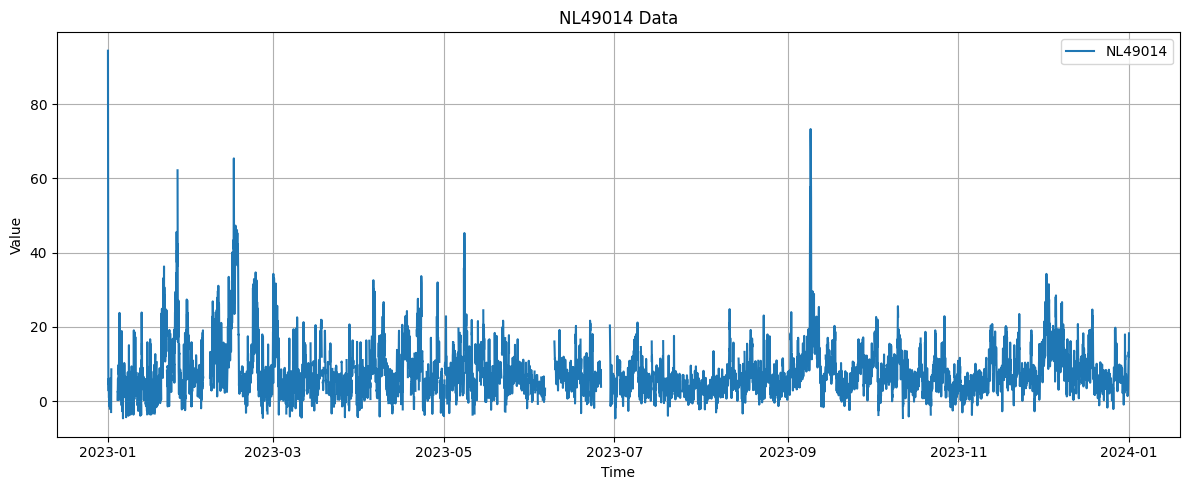

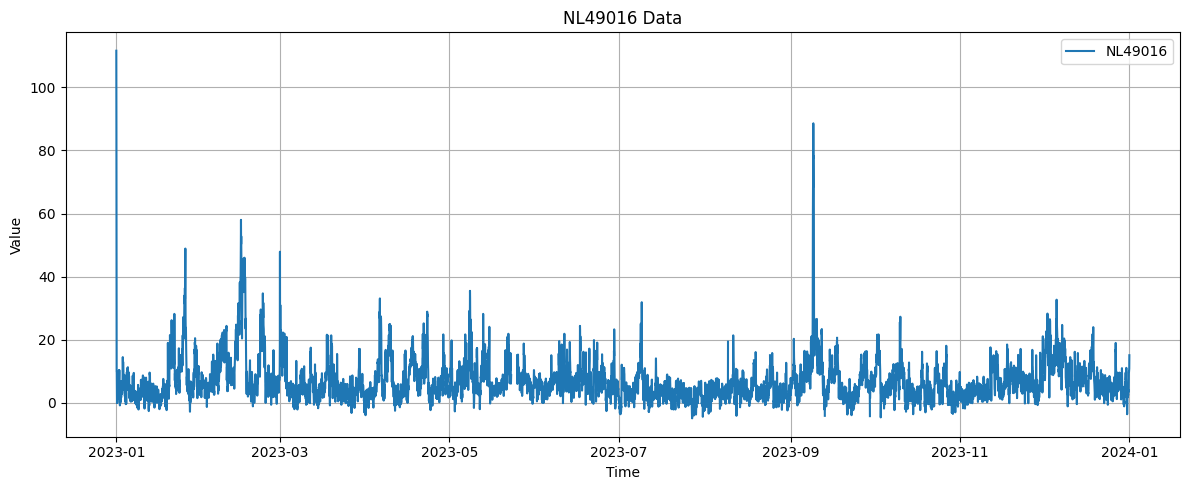

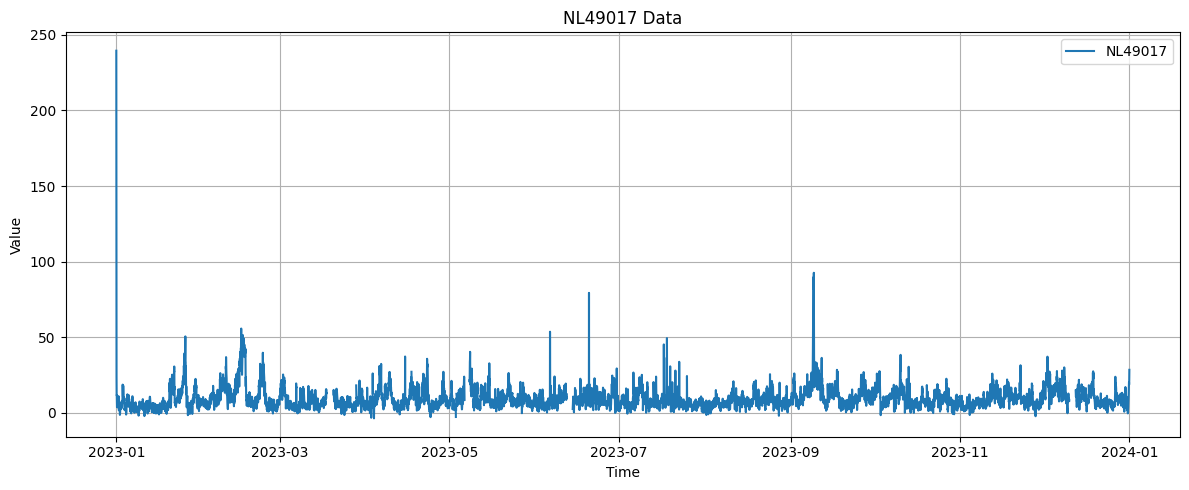

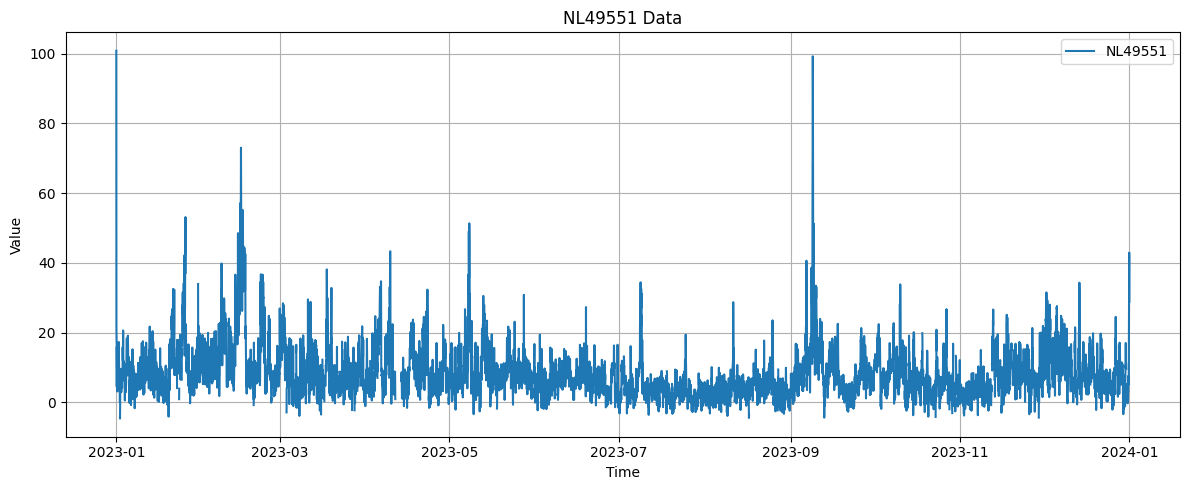

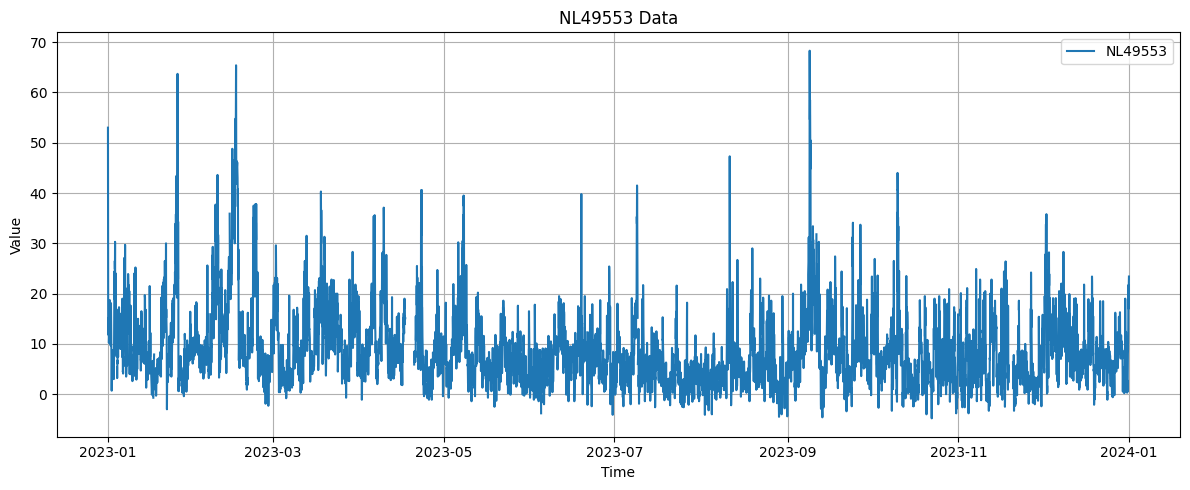

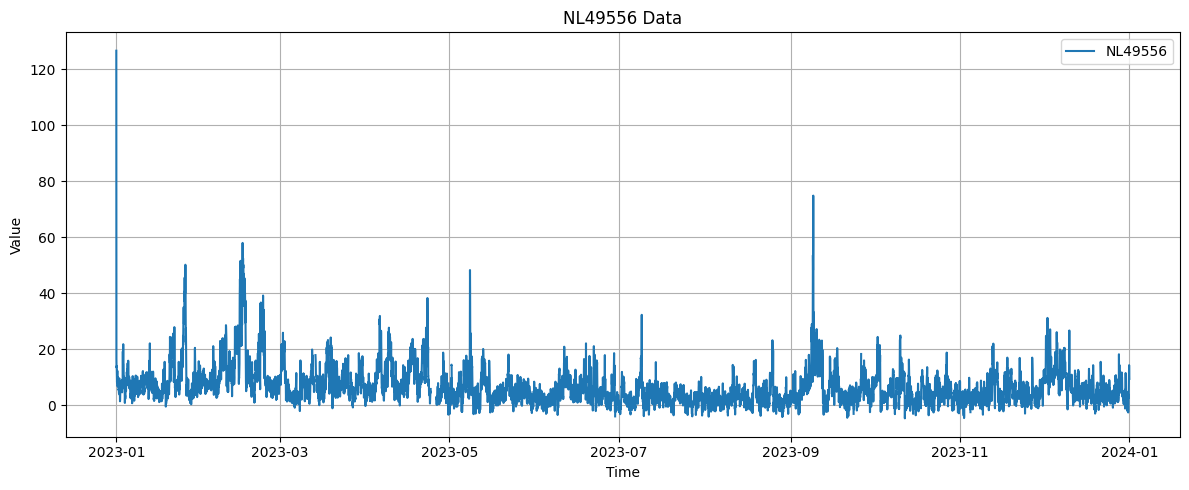

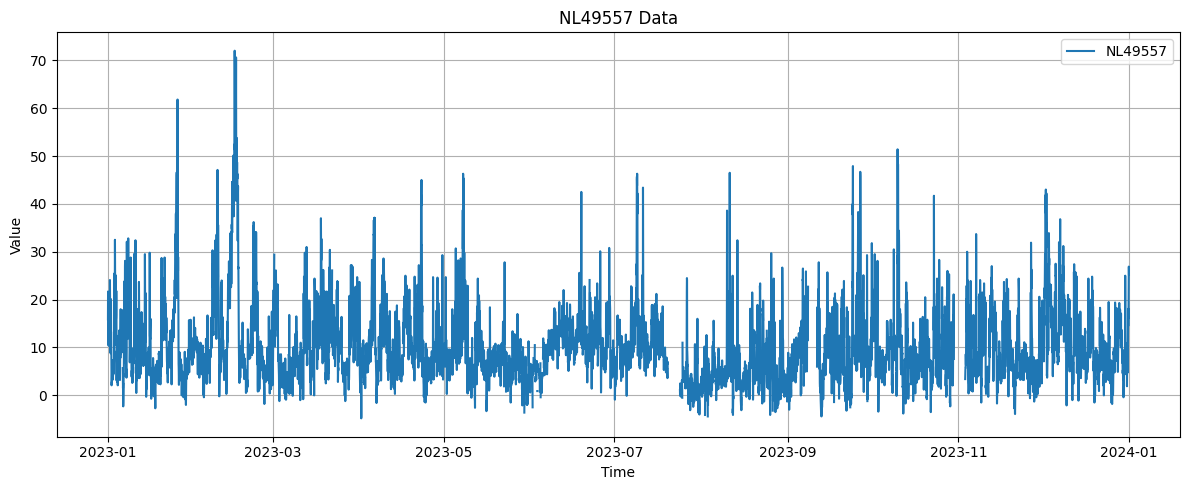

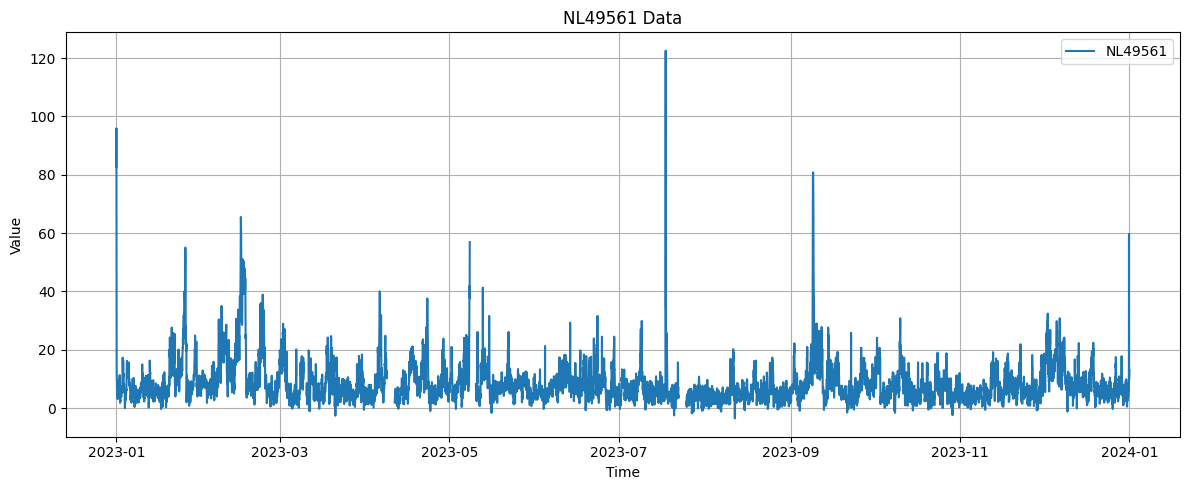

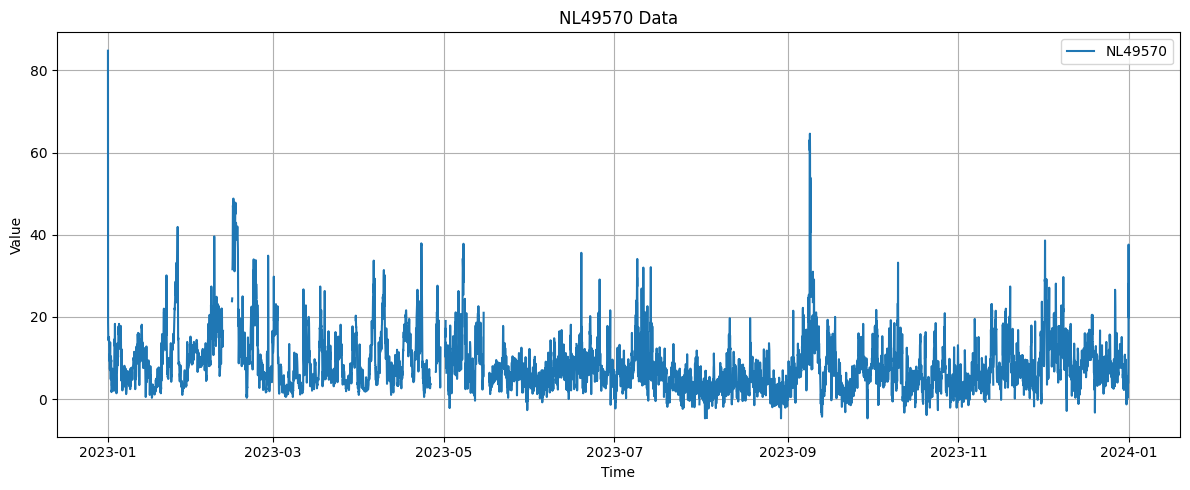

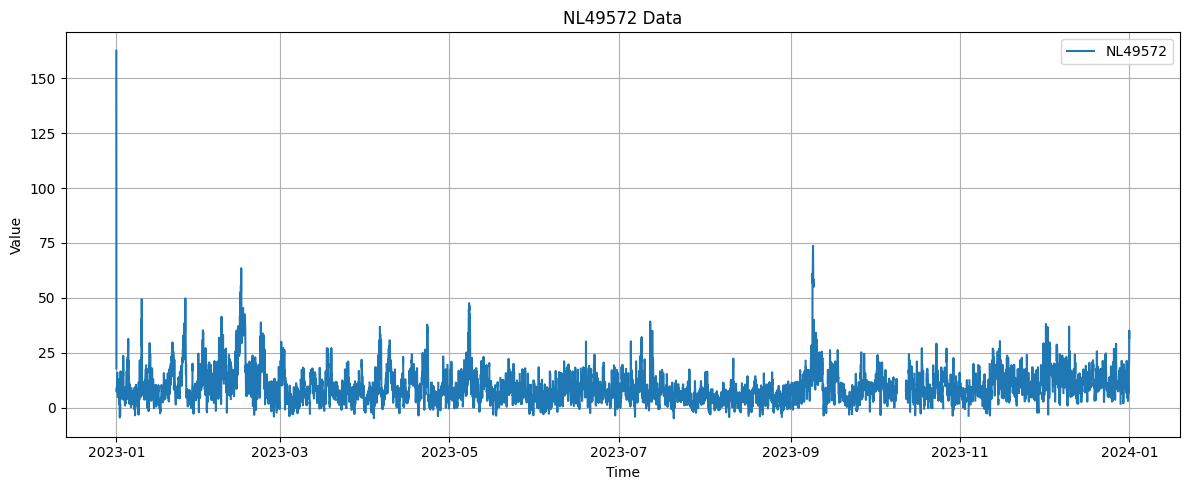

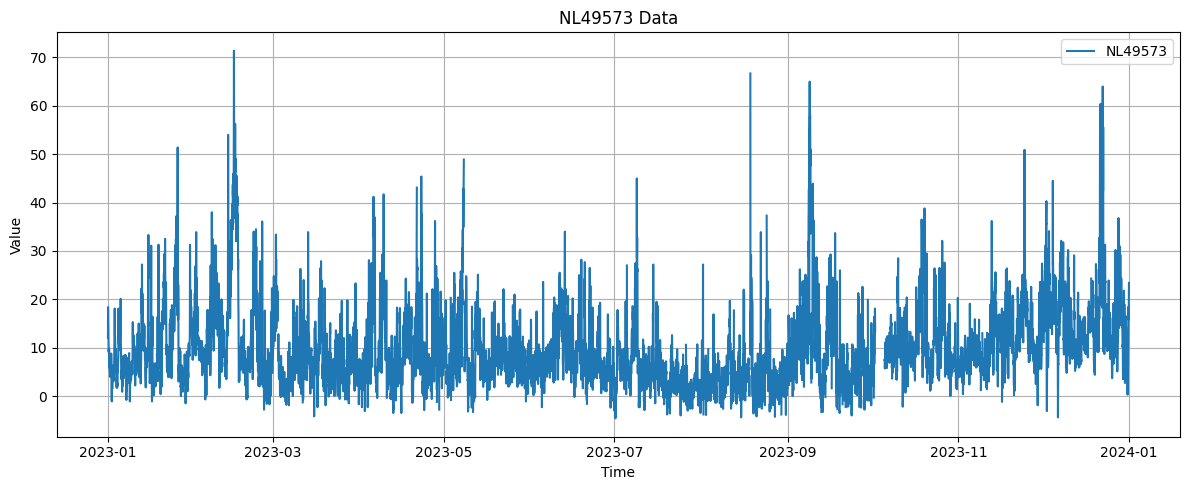

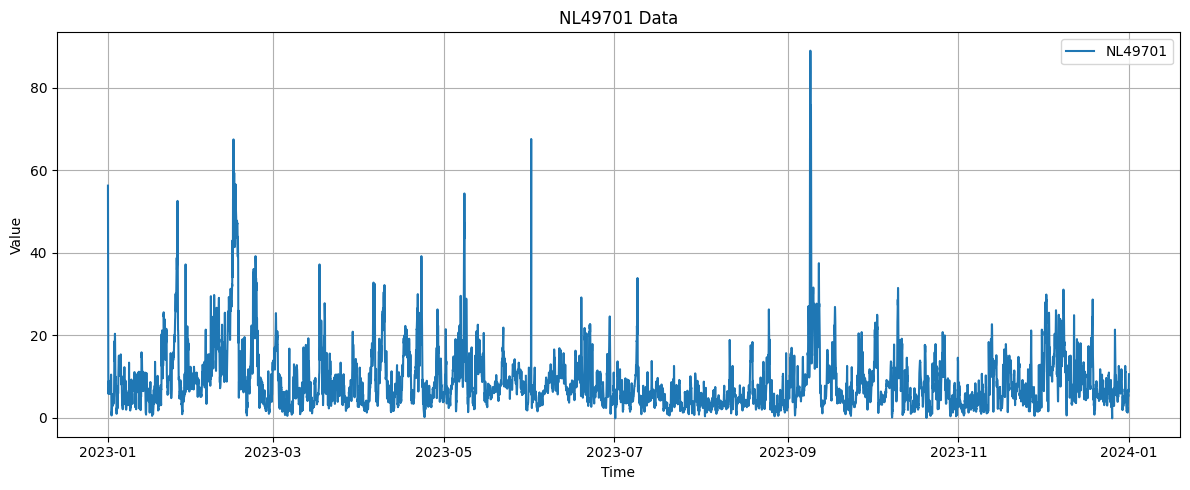

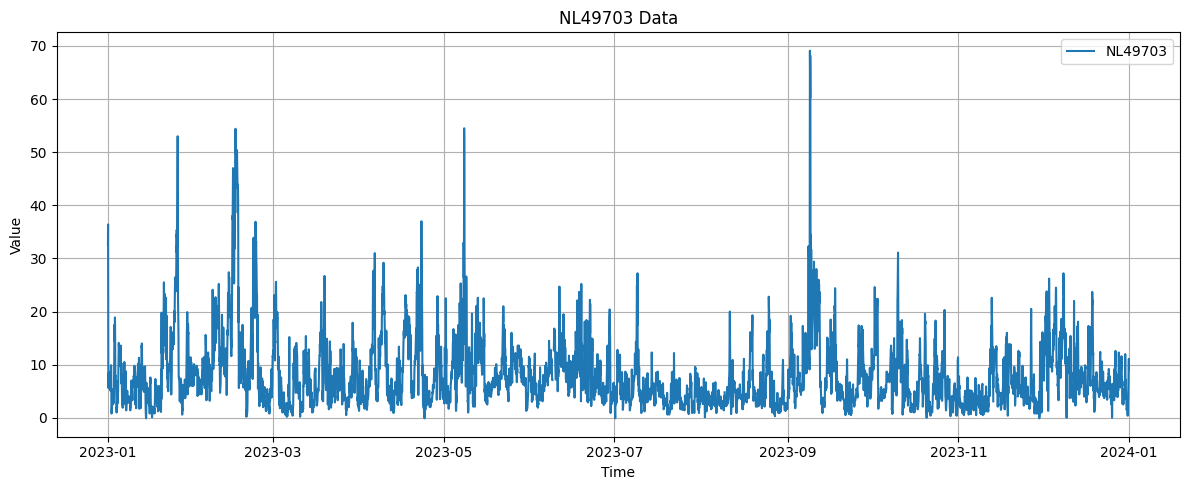

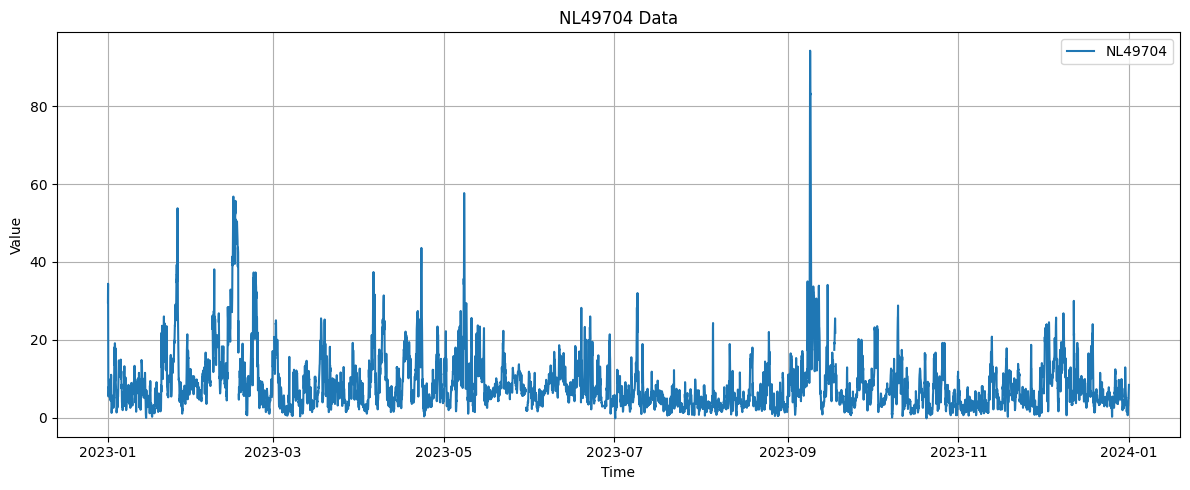

In [8]:
for station in stations:
    X = df['Begindatumtijd']
    y = df[station]
    
    plt.figure(figsize=(12, 5)) 
    plt.plot(X, y, label=station)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{station} Data')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

## impute missing values

In [38]:
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = df.copy()
df_imputed[stations] = imputer.fit_transform(df[stations])

In [39]:
df_imputed.isnull().sum()

Component         0
Bep.periode       0
Eenheid           0
Begindatumtijd    0
Einddatumtijd     0
NL01485           0
NL01487           0
NL01488           0
NL01489           0
NL01491           0
NL01493           0
NL01494           0
NL01495           0
NL01496           0
NL01497           0
NL01912           0
NL01913           0
NL10131           0
NL10136           0
NL10138           0
NL10230           0
NL10240           0
NL10241           0
NL10247           0
NL10248           0
NL10404           0
NL10418           0
NL10444           0
NL10449           0
NL10450           0
NL10538           0
NL10636           0
NL10641           0
NL10643           0
NL10644           0
NL10738           0
NL10741           0
NL10742           0
NL10821           0
NL10934           0
NL10937           0
NL10938           0
NL49007           0
NL49012           0
NL49014           0
NL49016           0
NL49017           0
NL49551           0
NL49553           0
NL49556           0


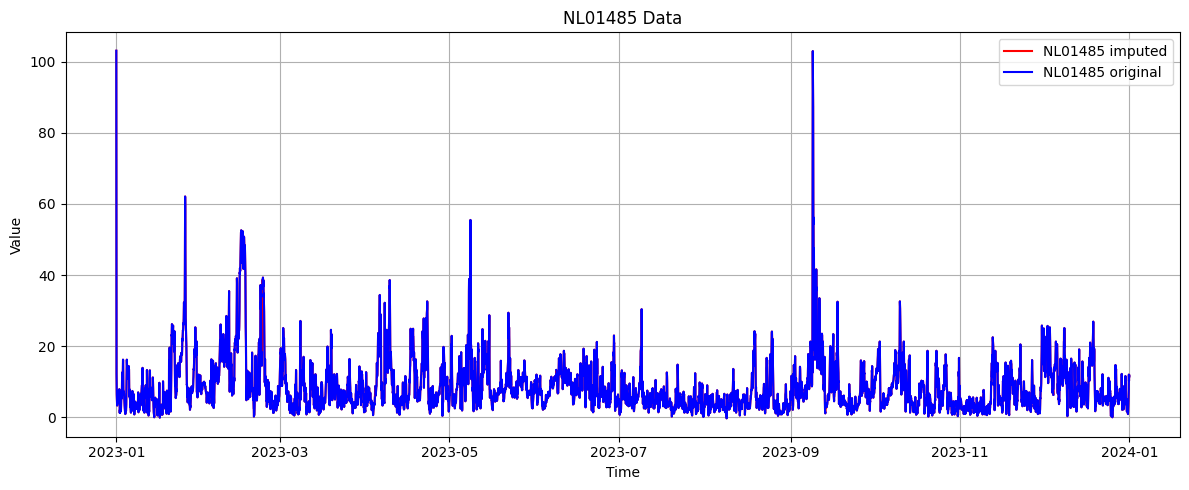

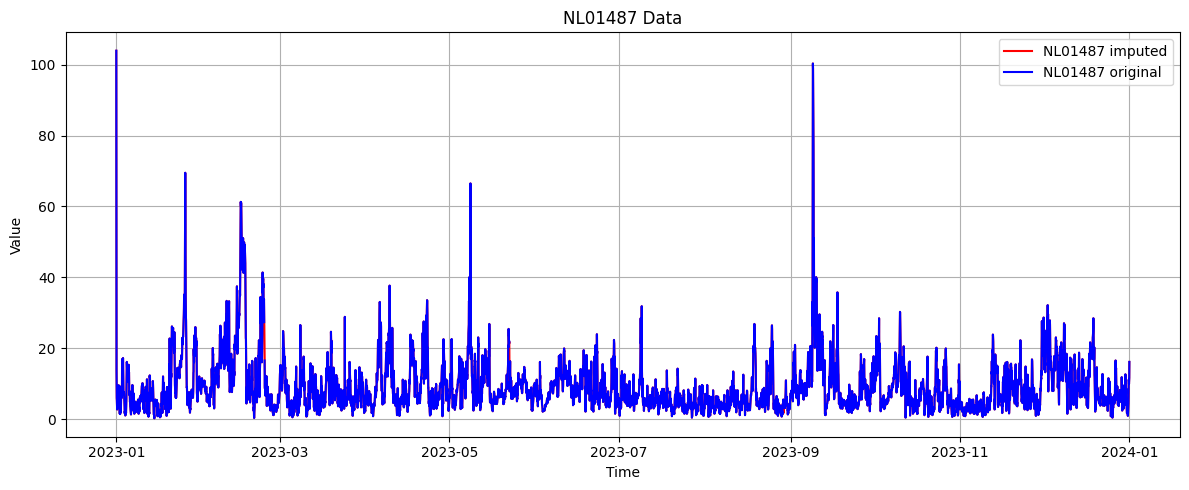

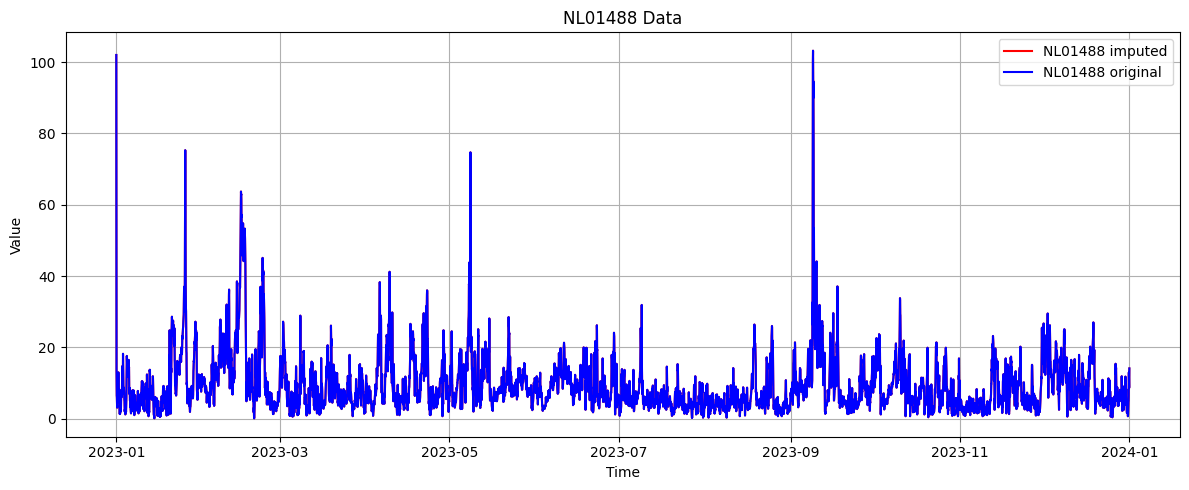

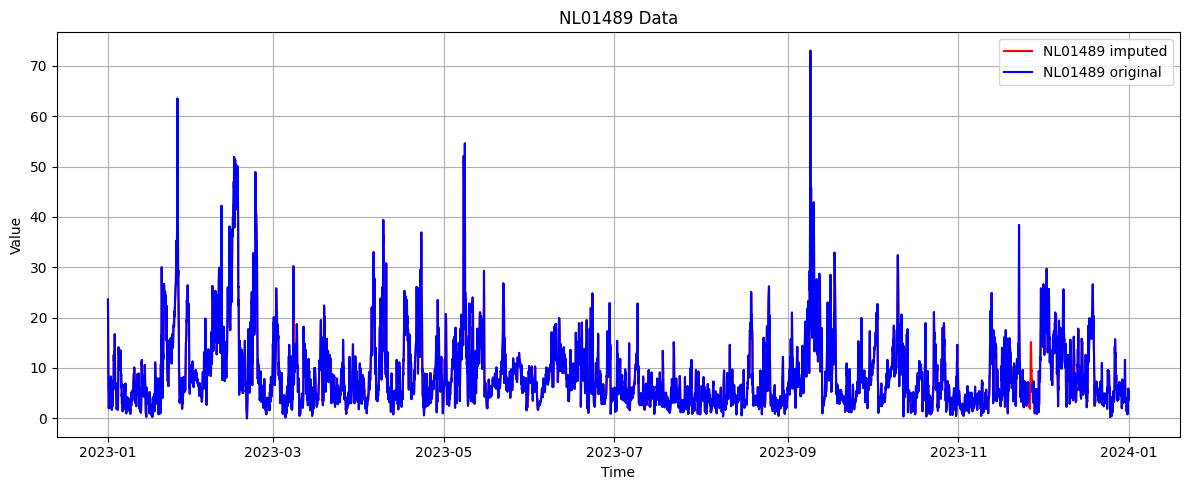

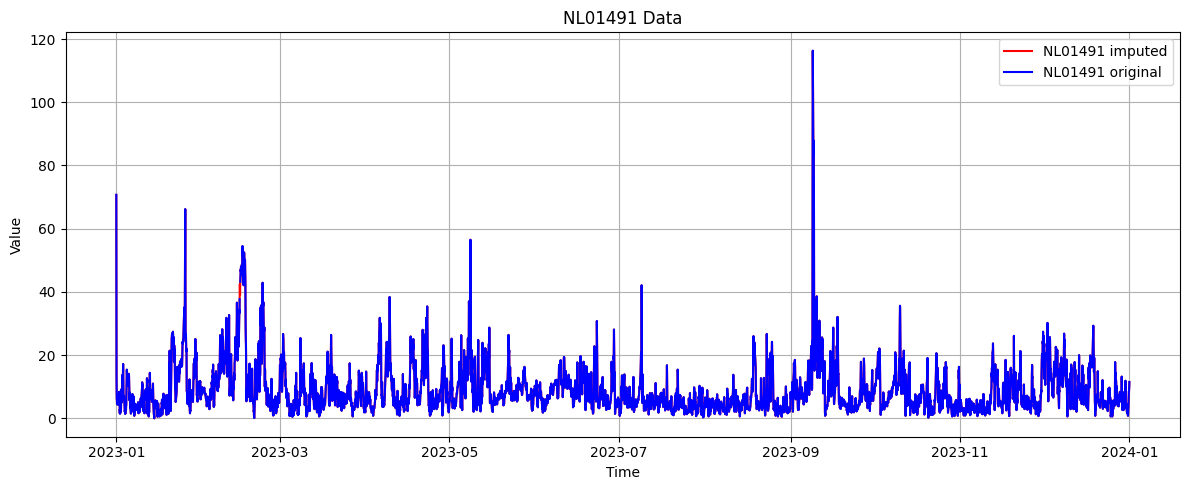

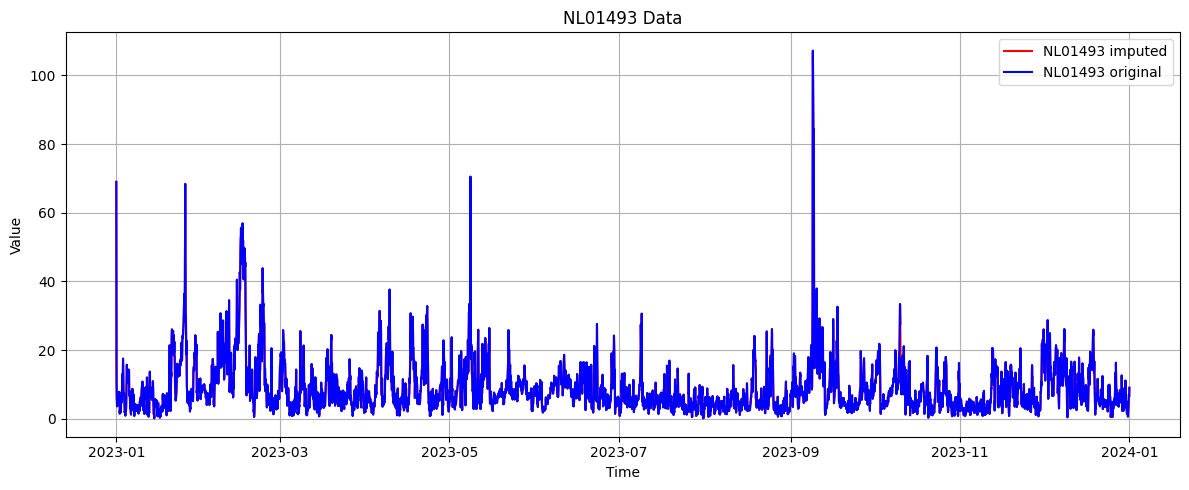

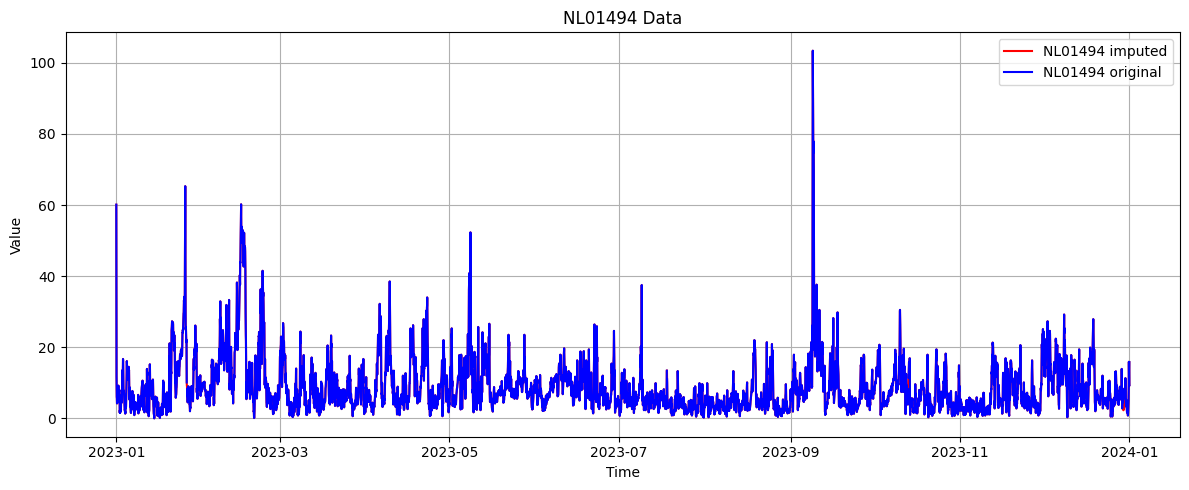

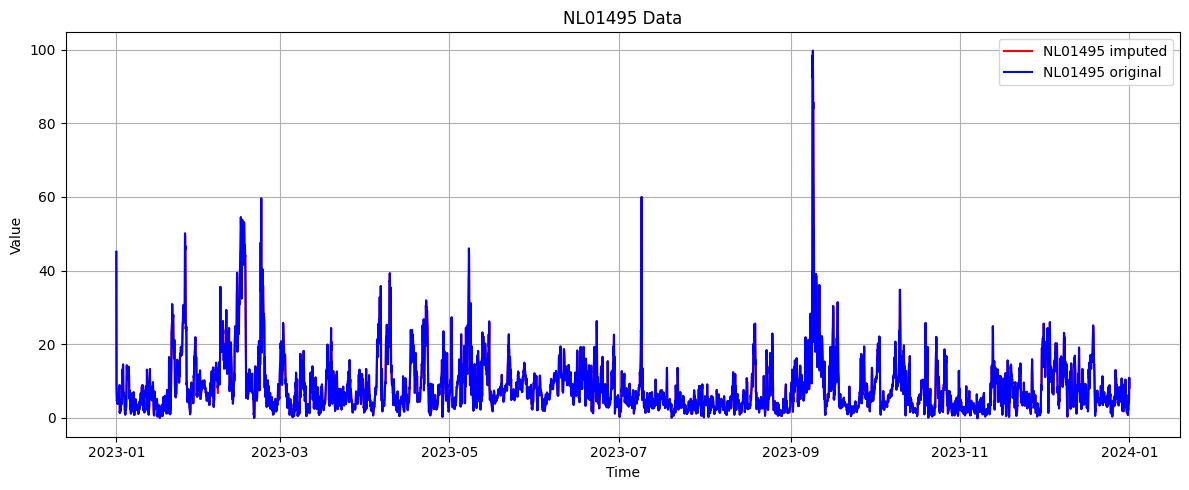

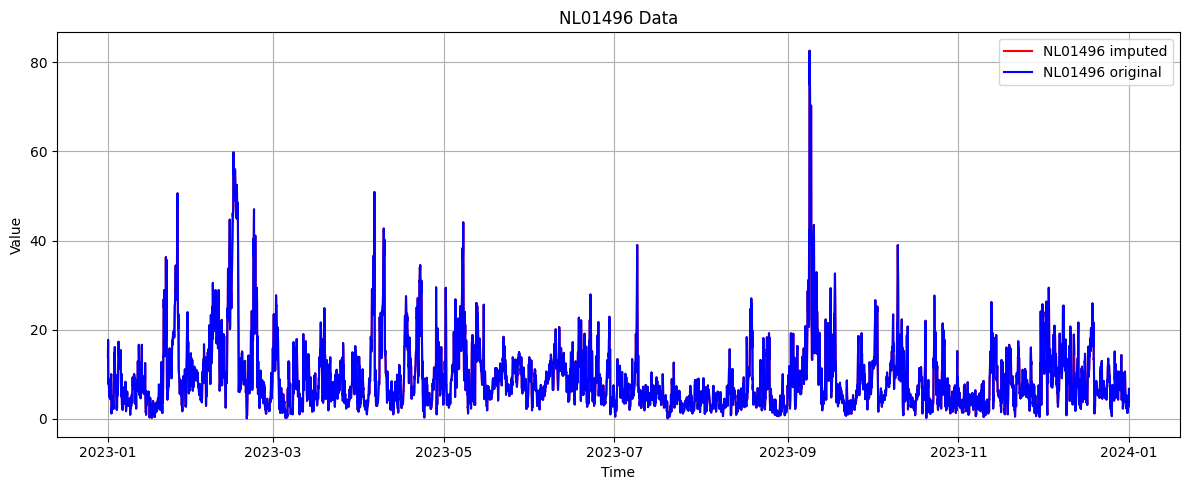

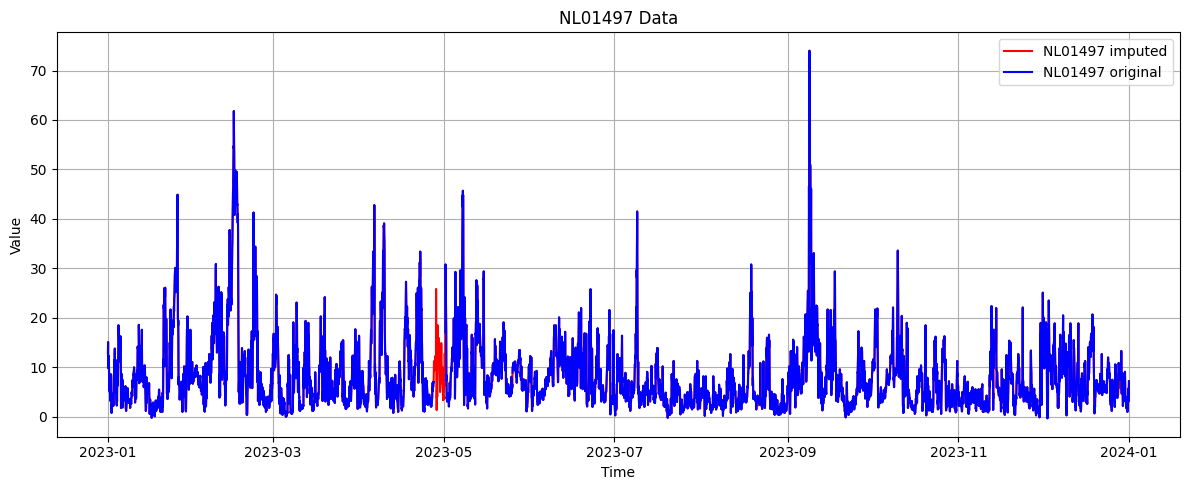

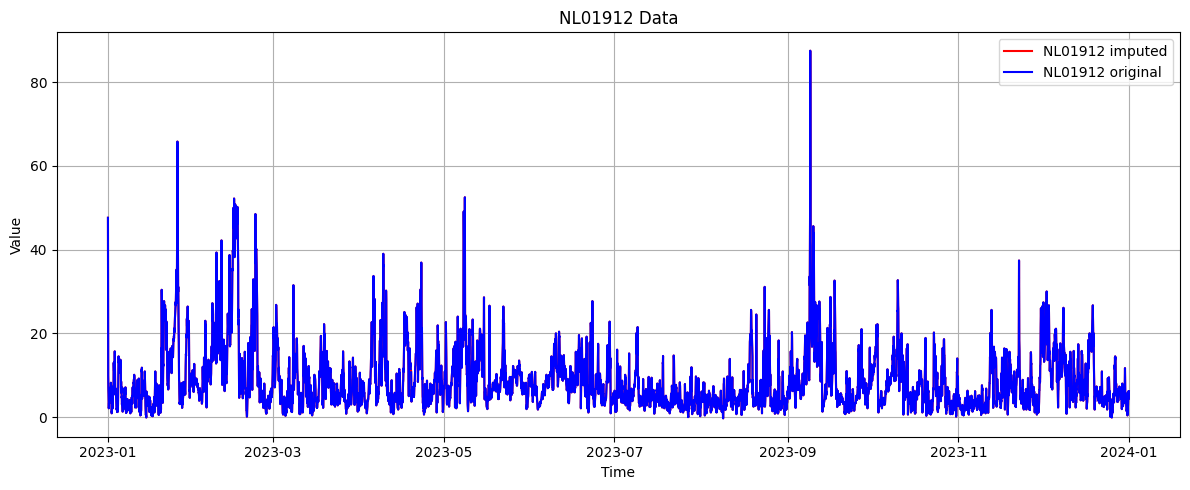

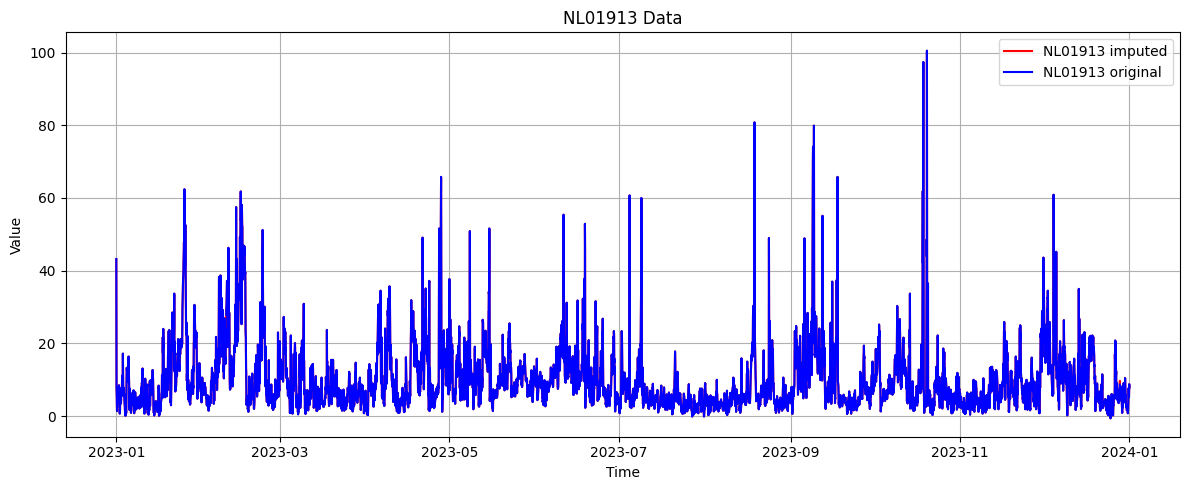

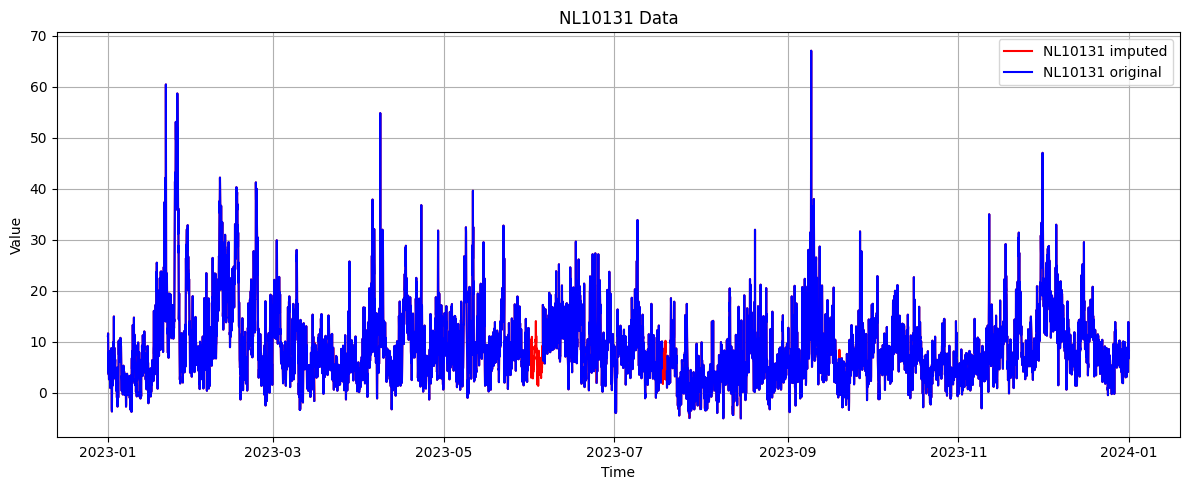

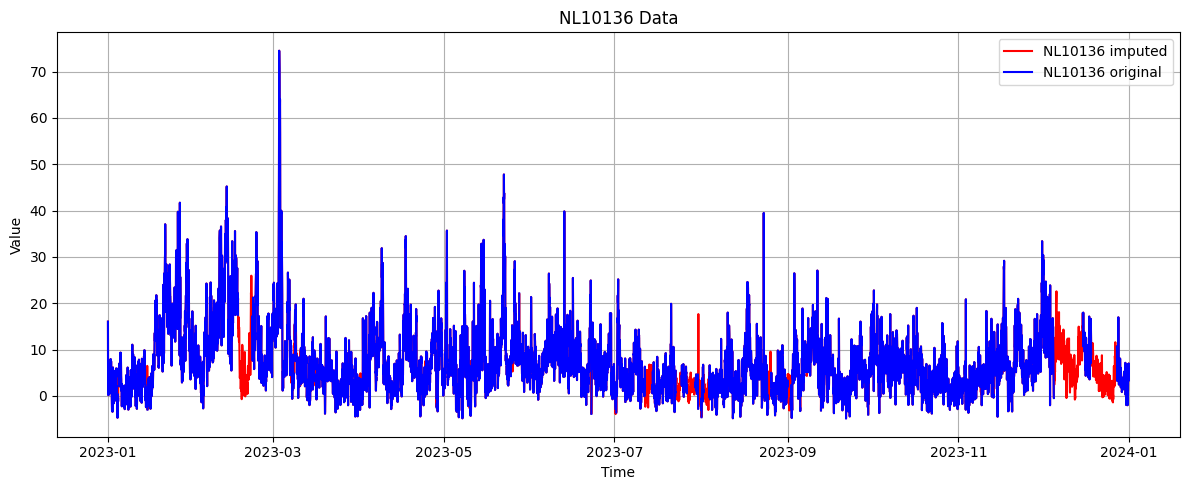

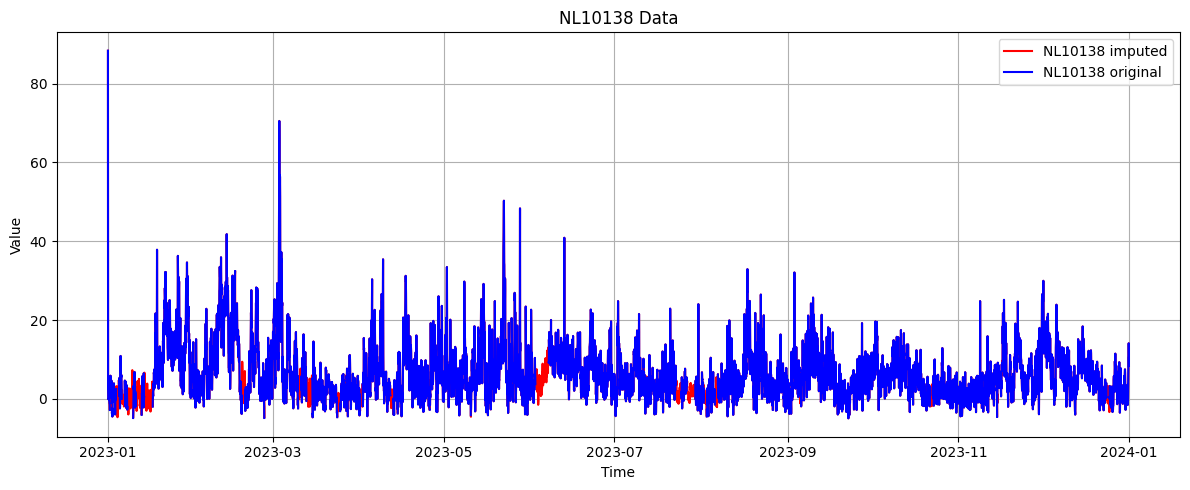

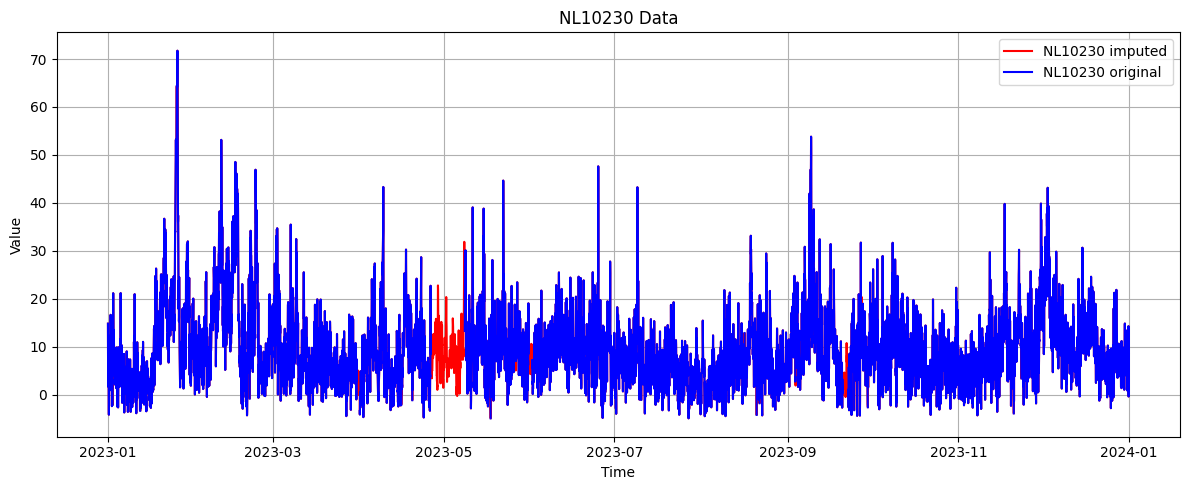

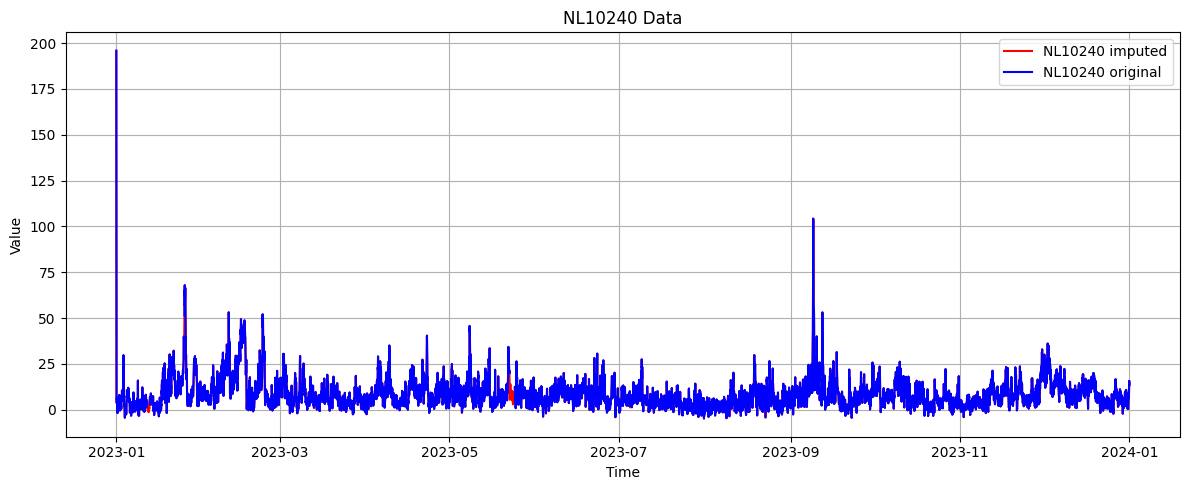

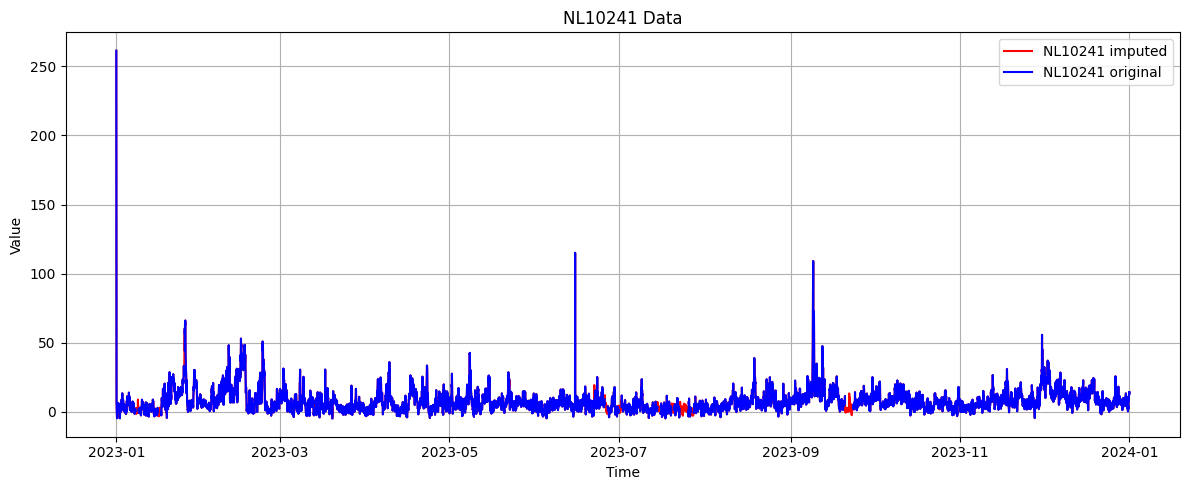

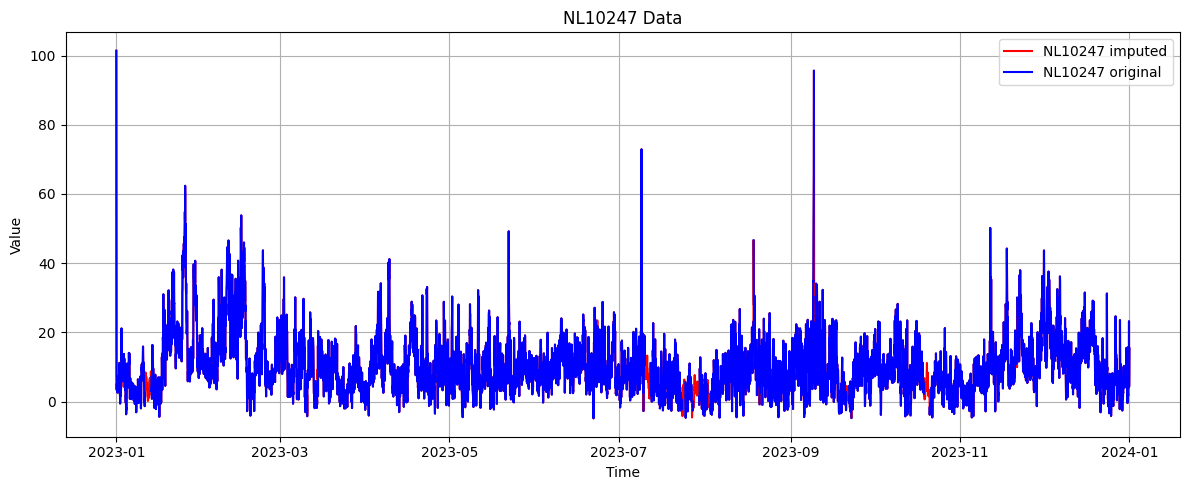

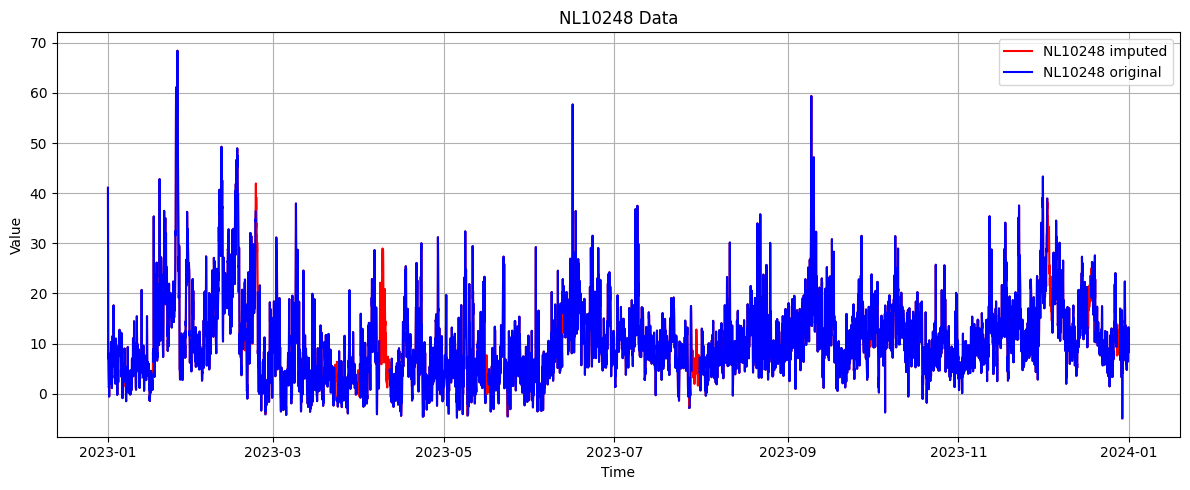

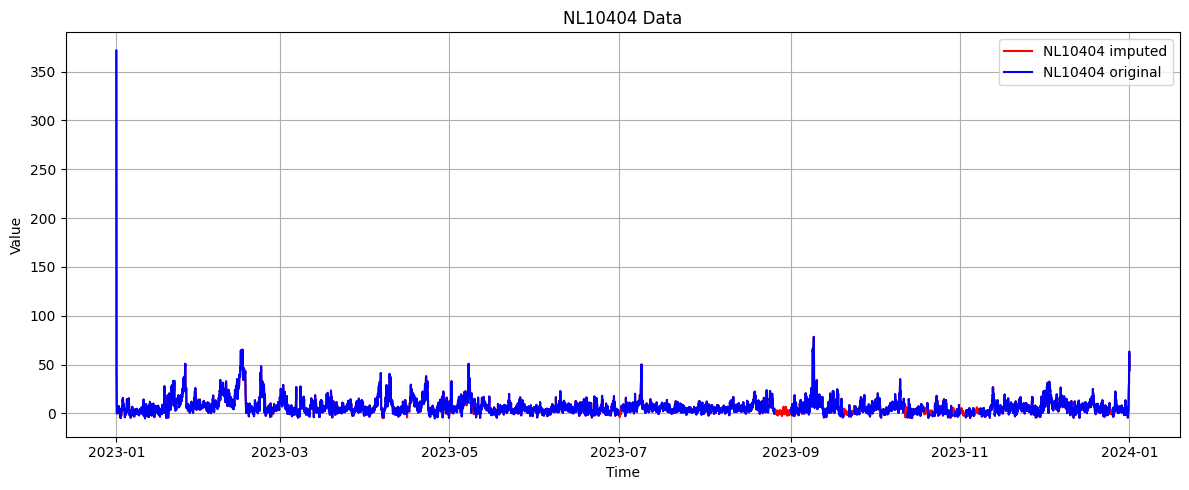

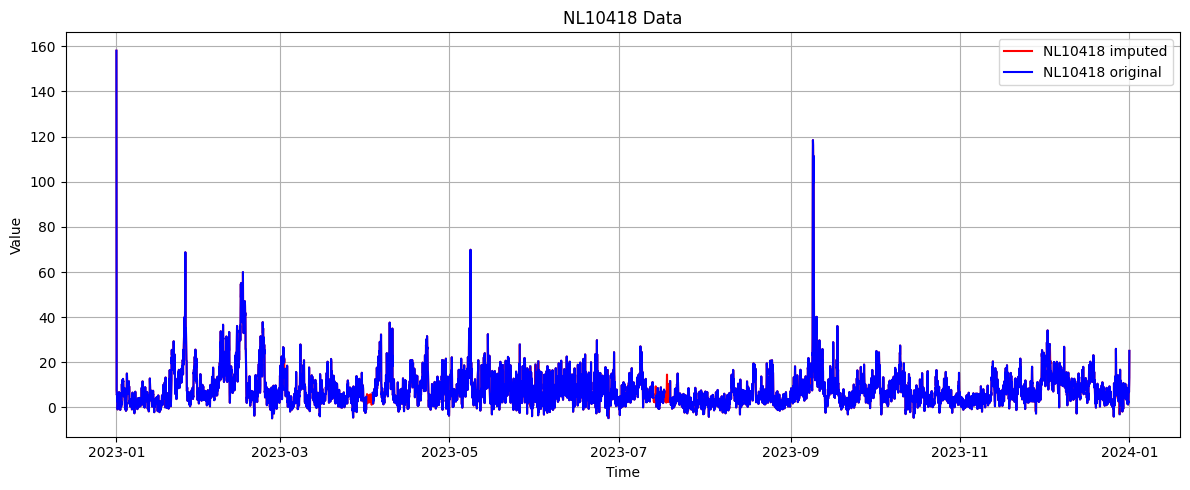

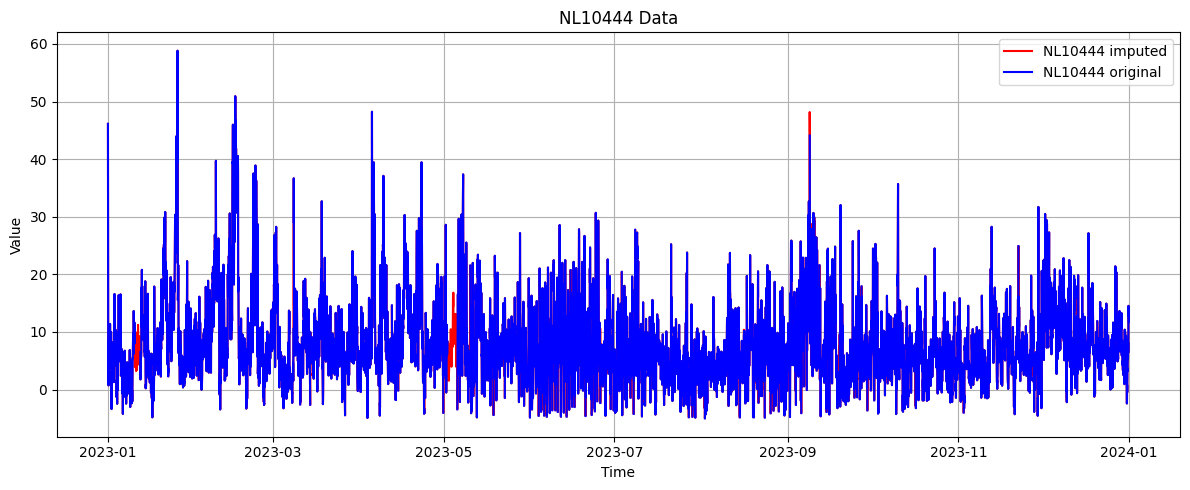

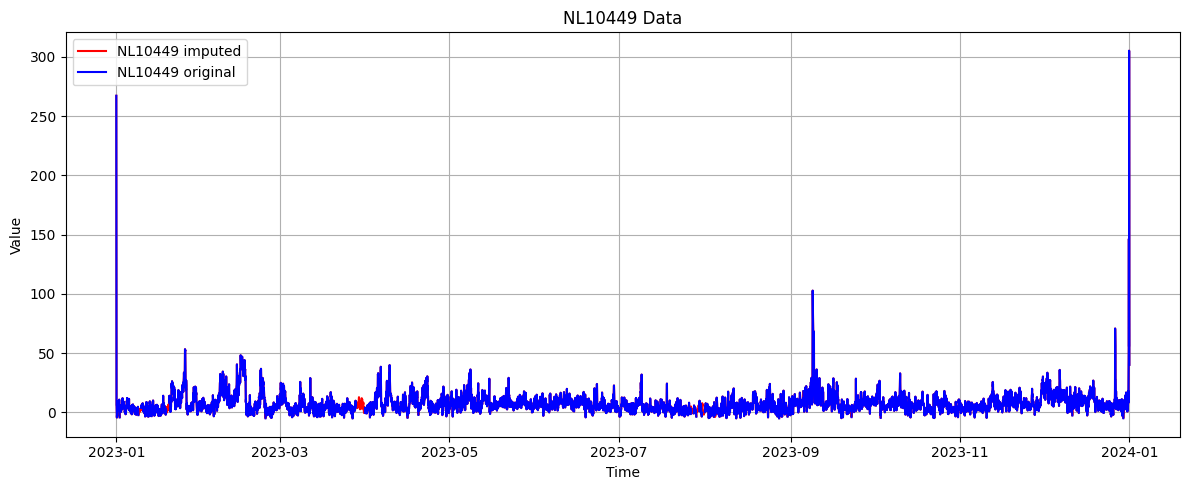

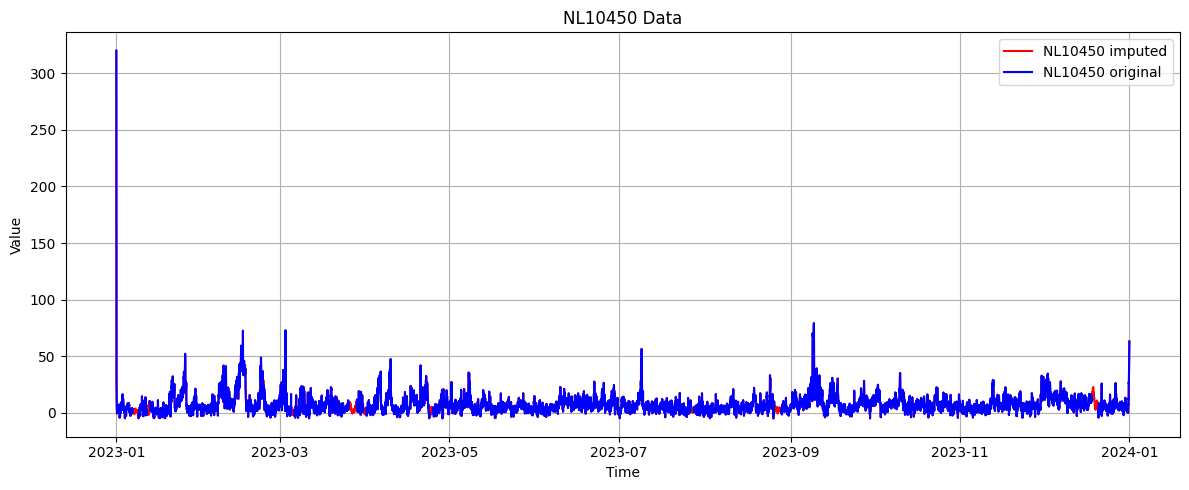

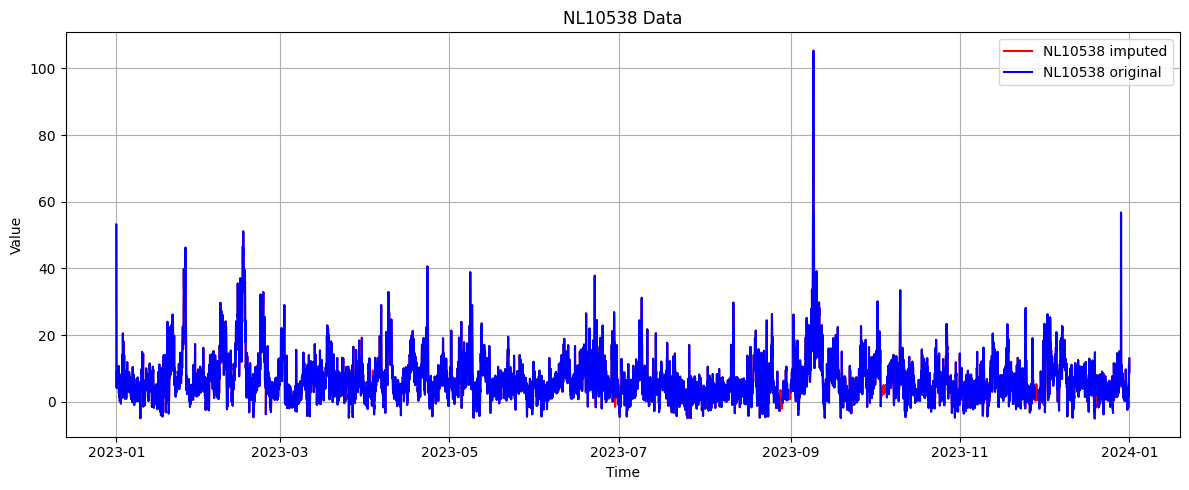

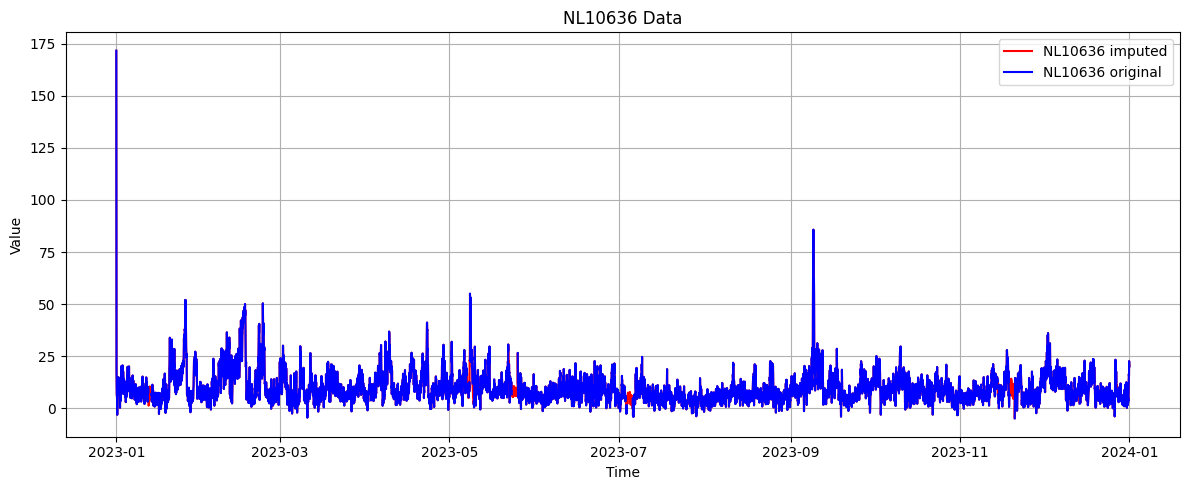

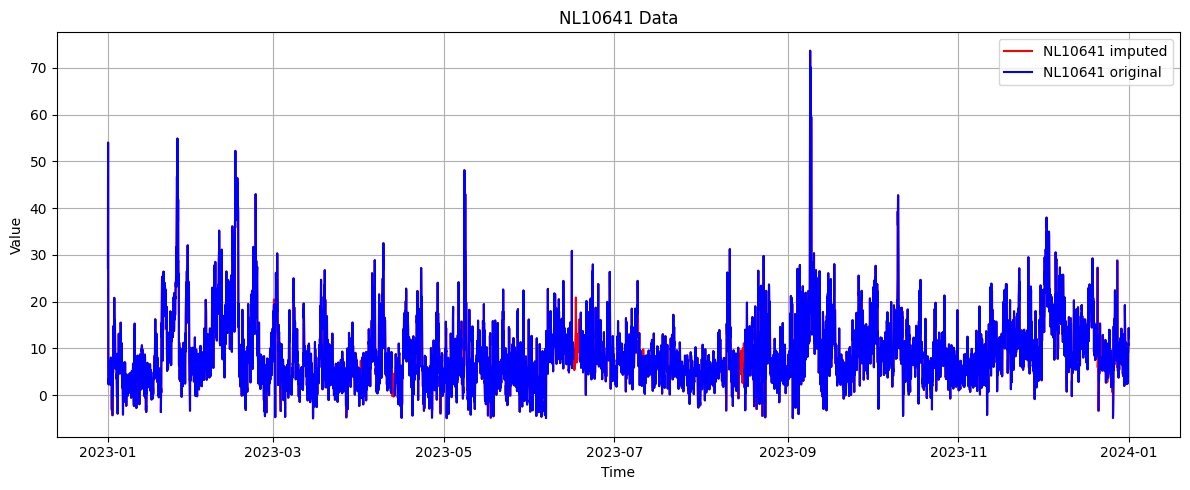

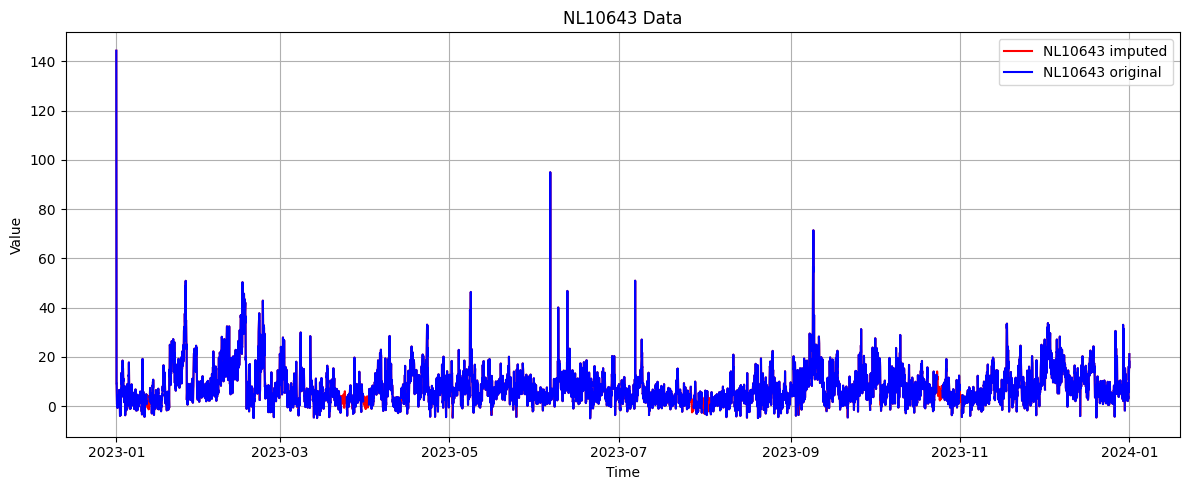

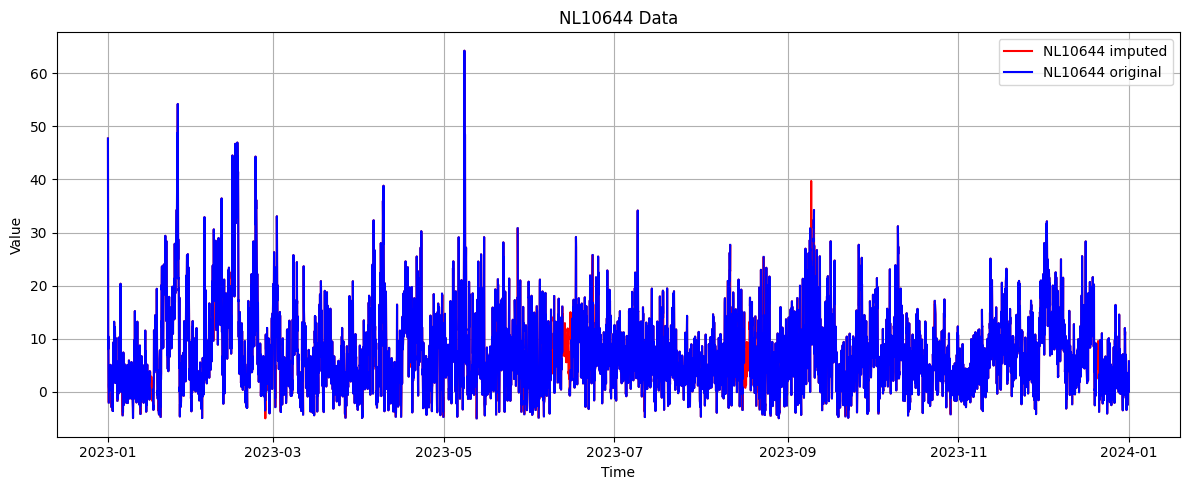

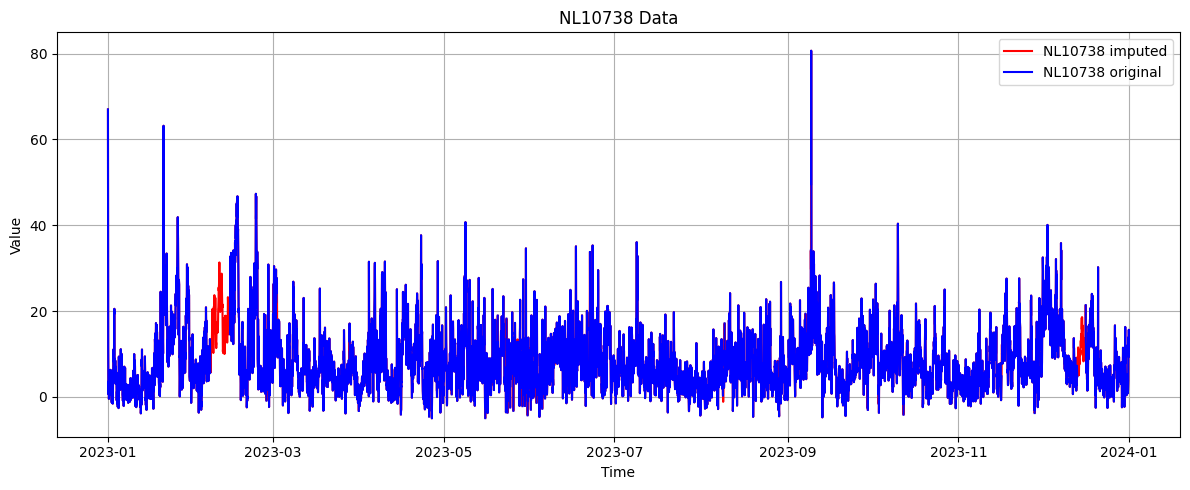

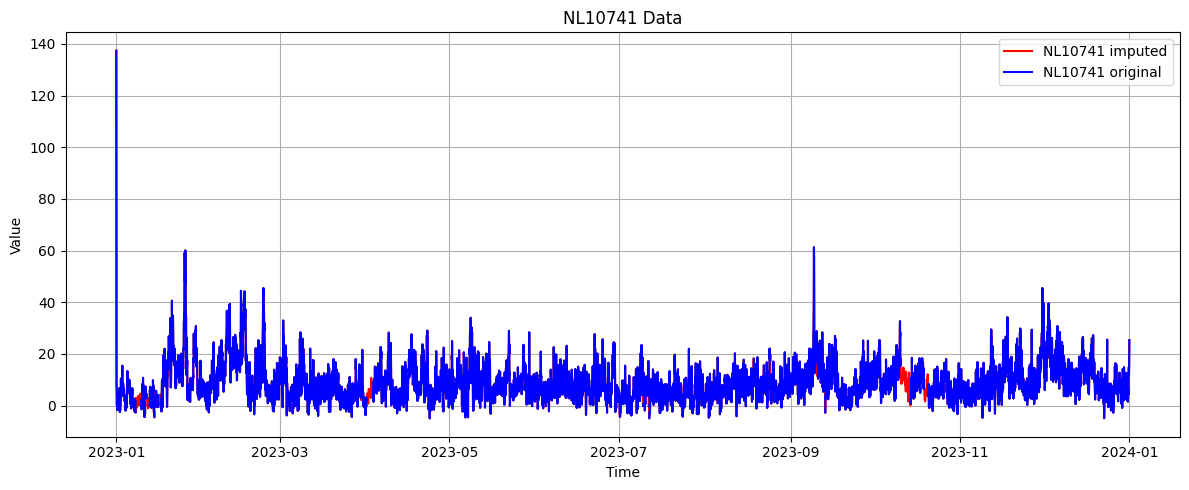

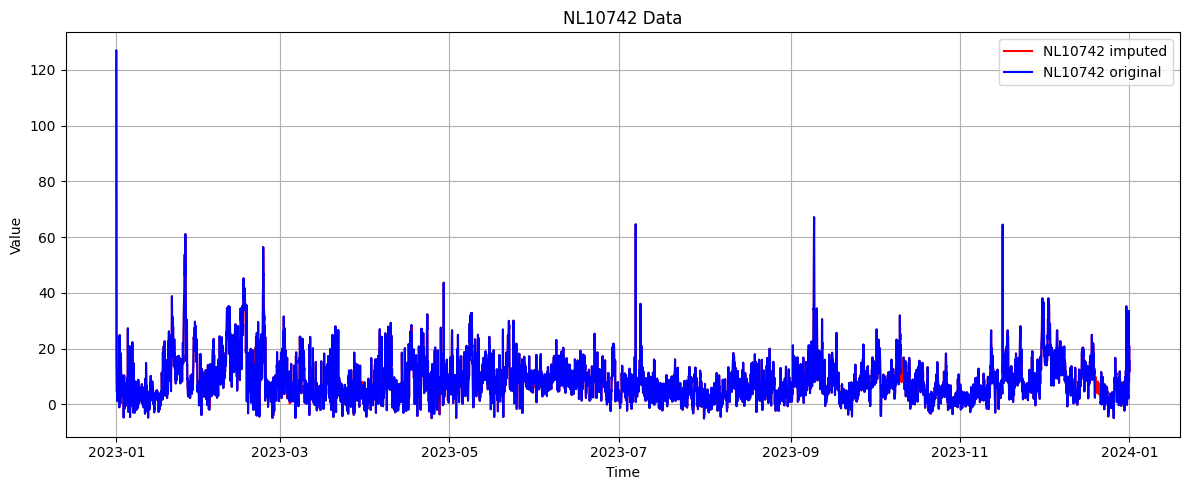

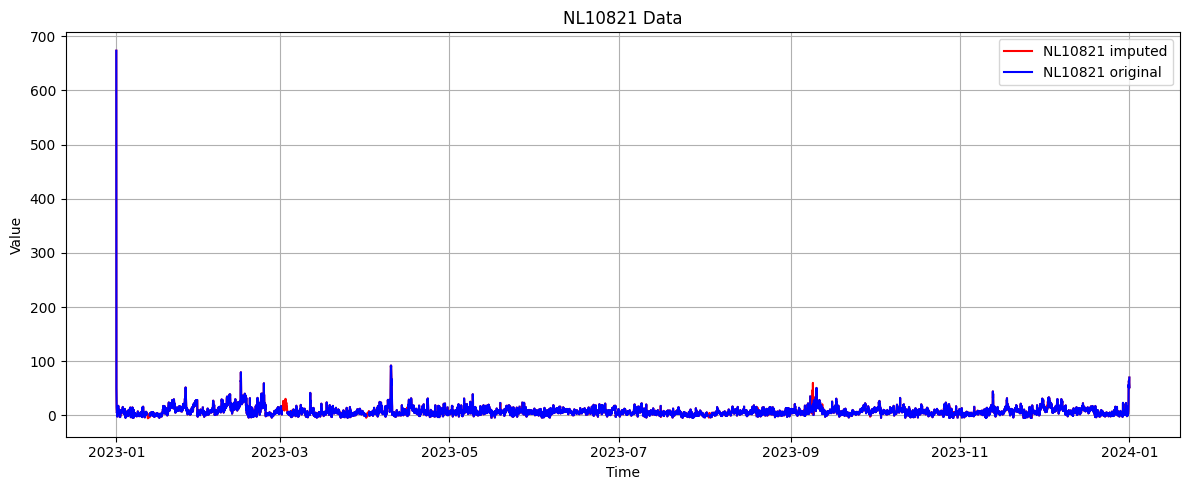

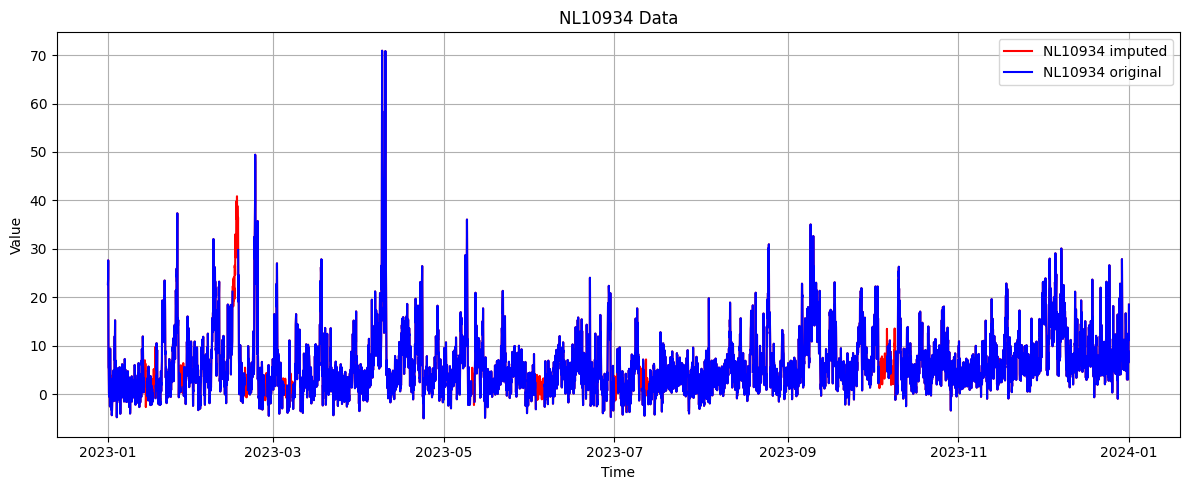

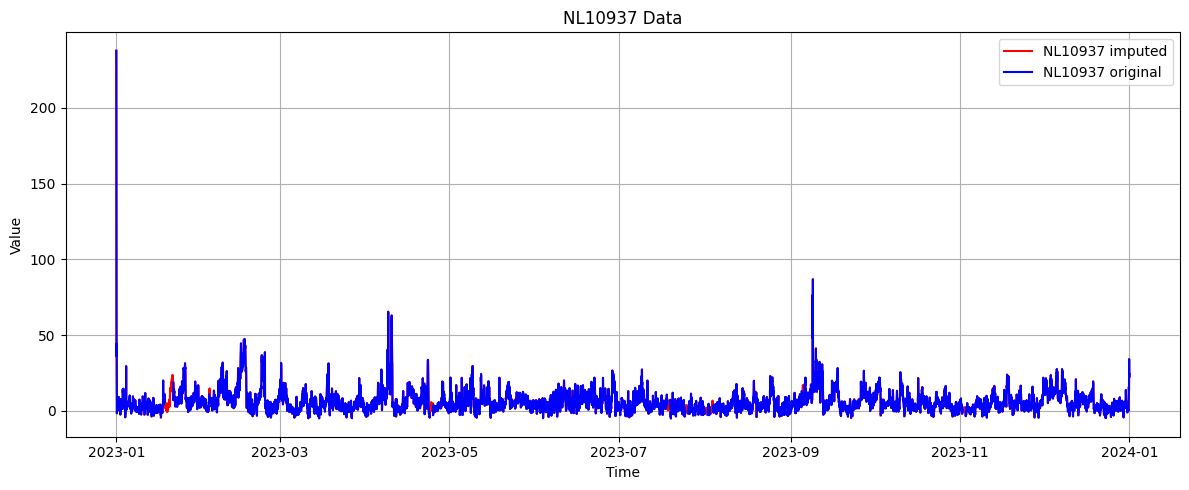

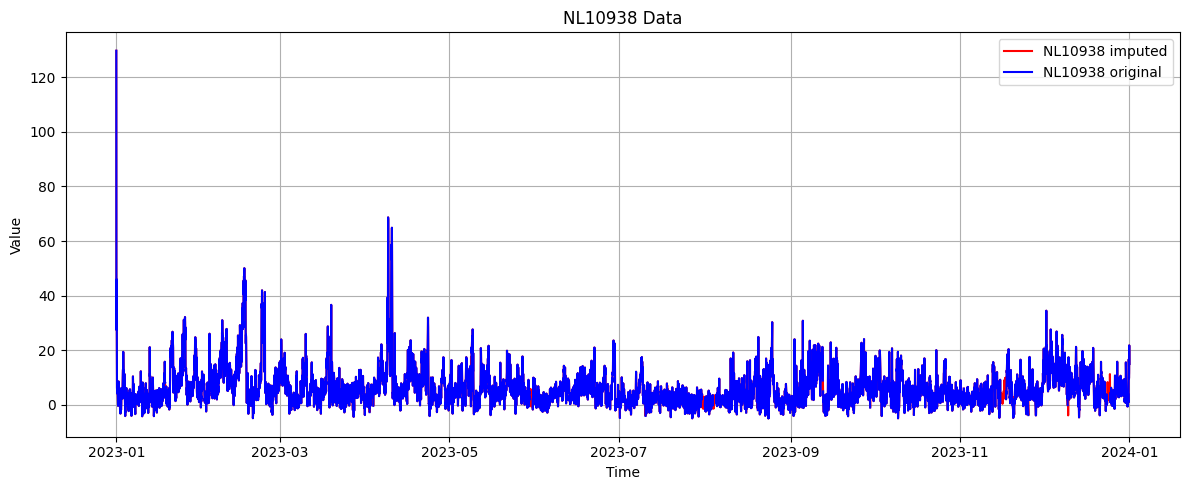

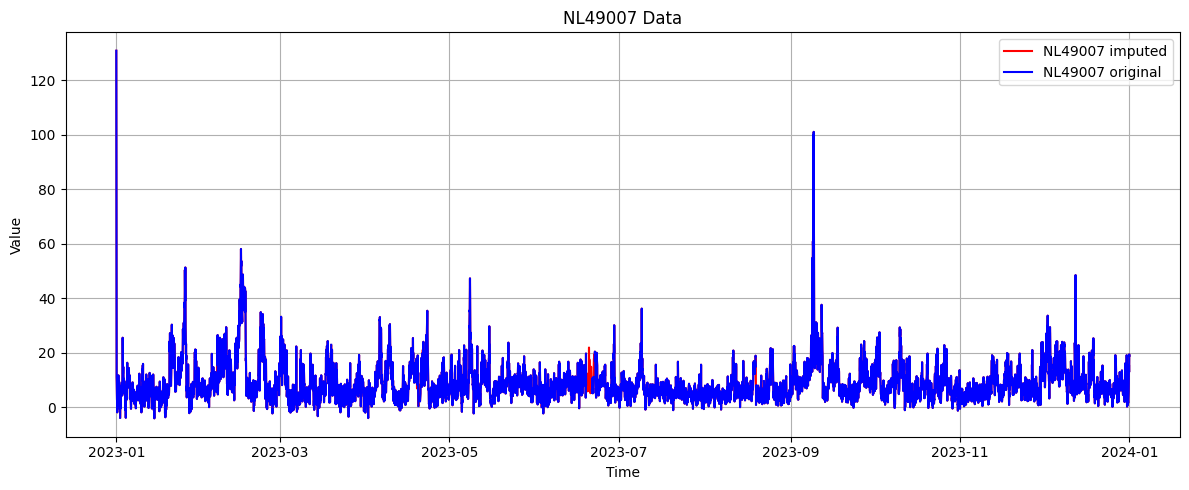

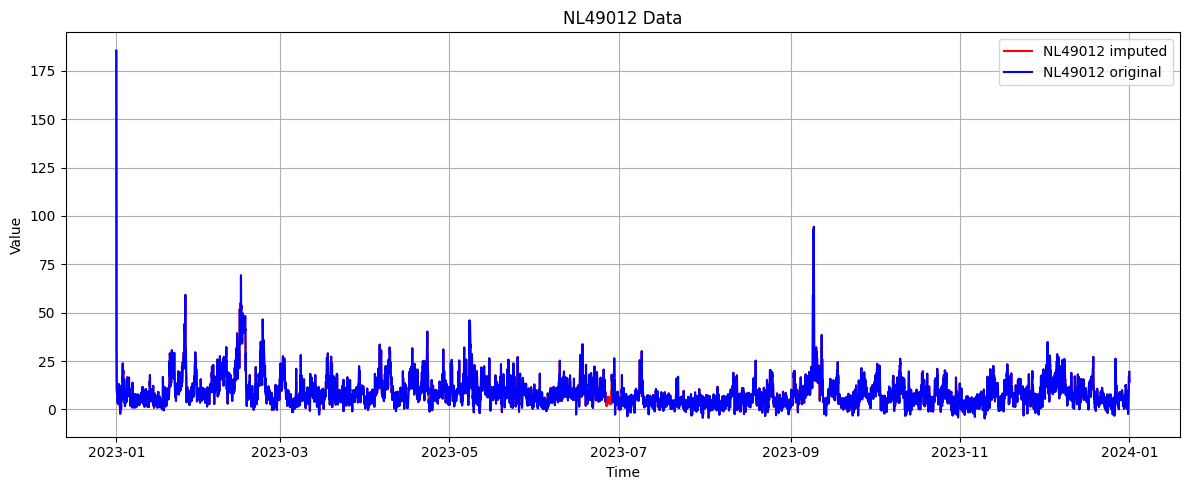

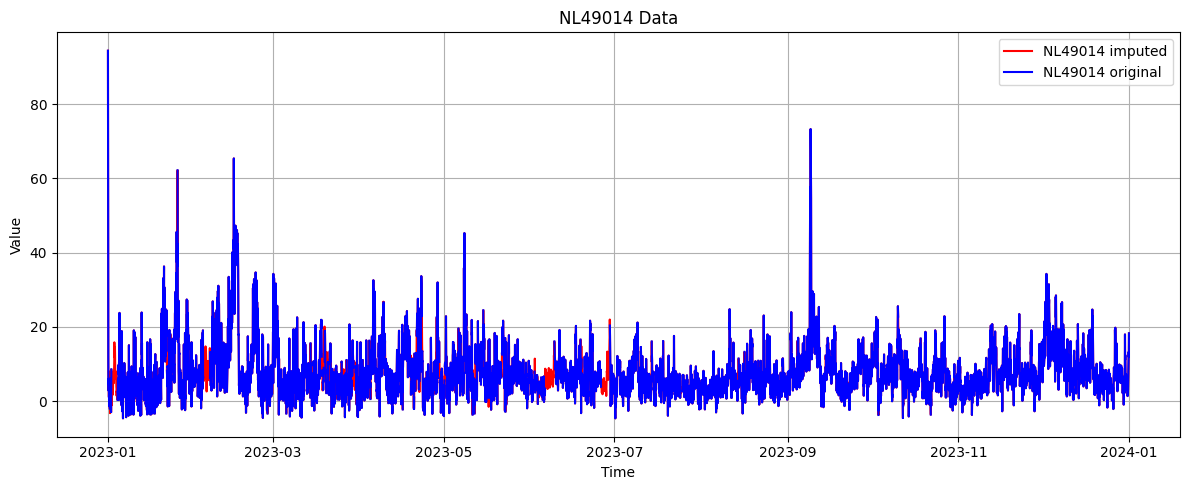

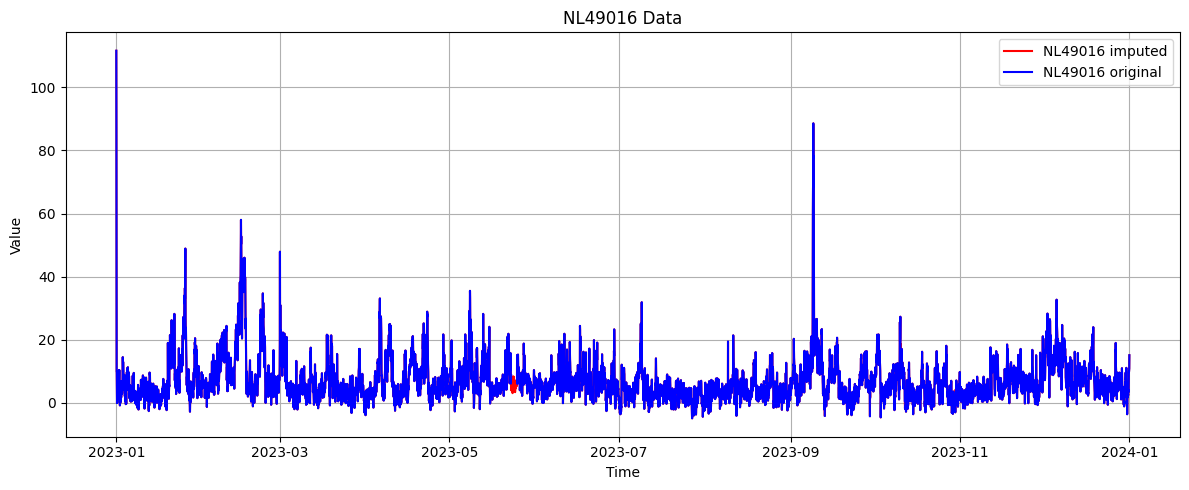

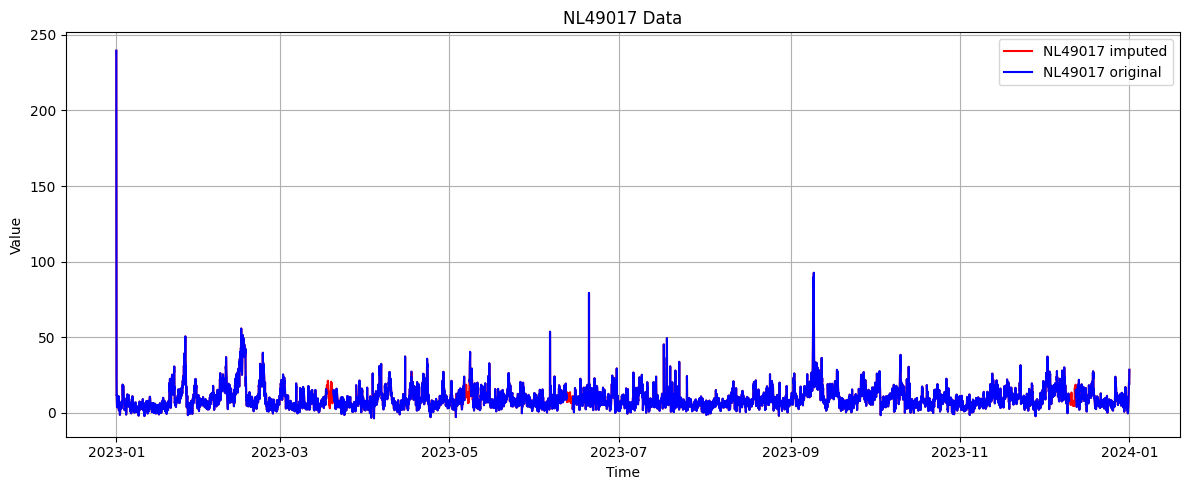

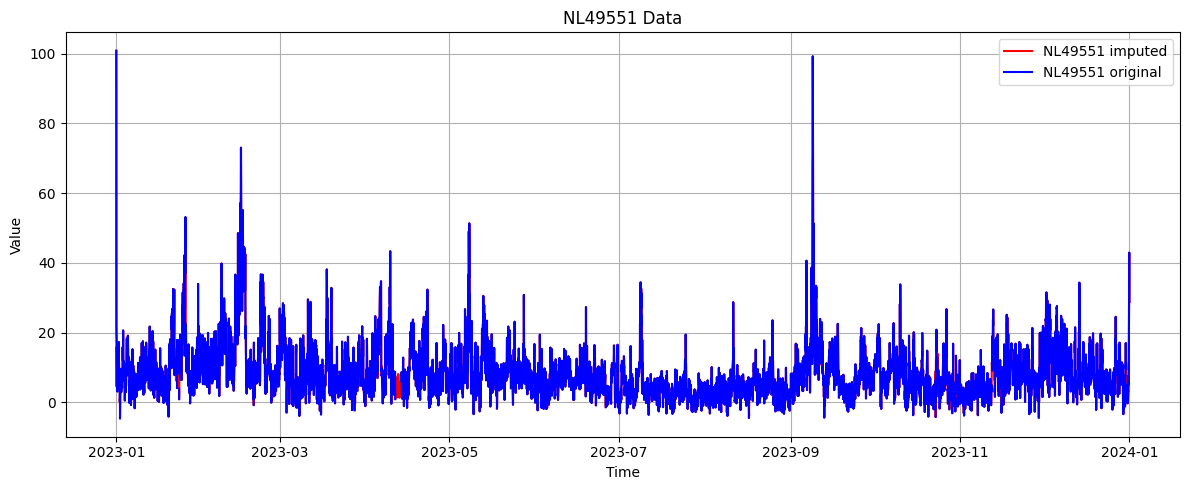

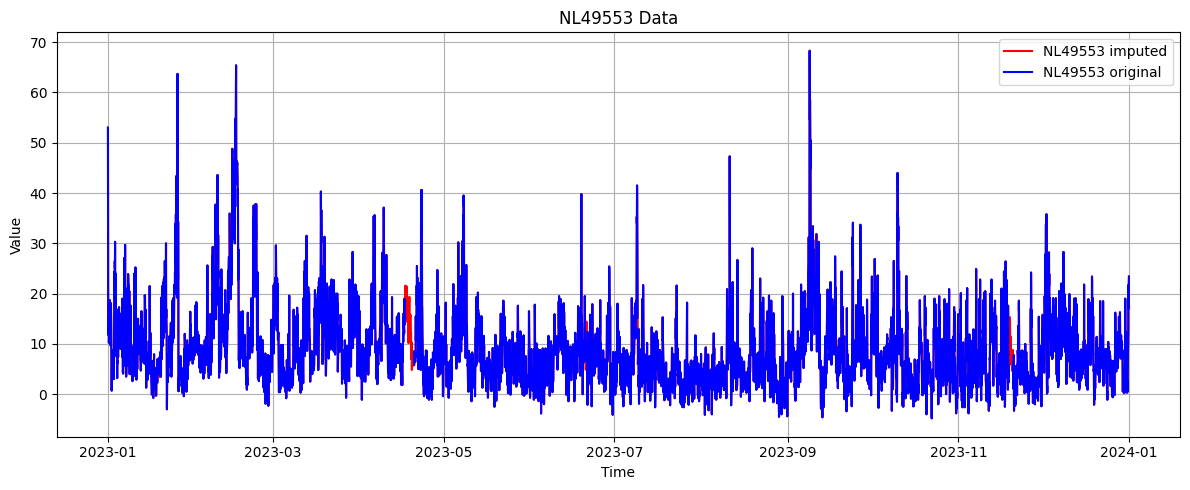

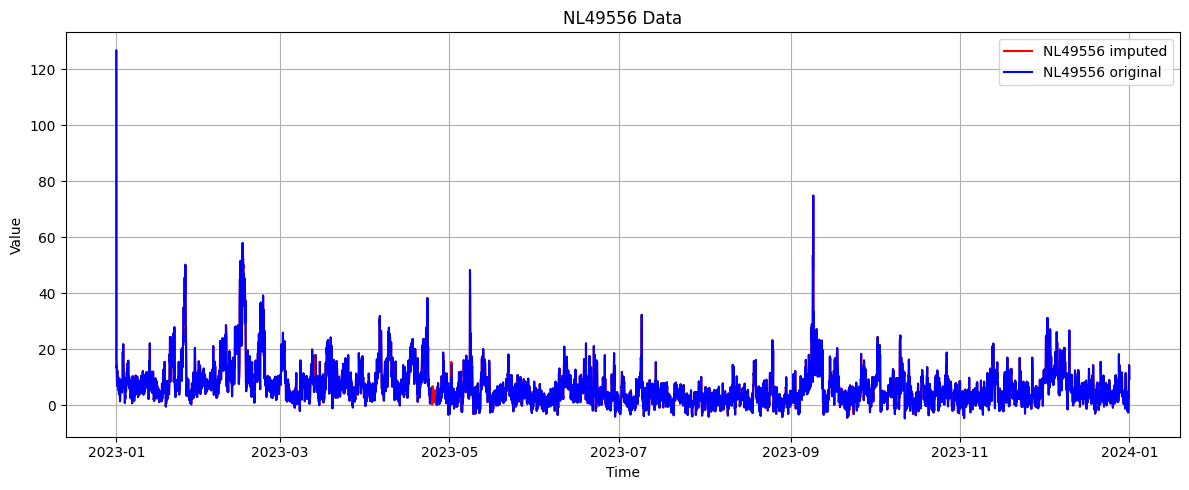

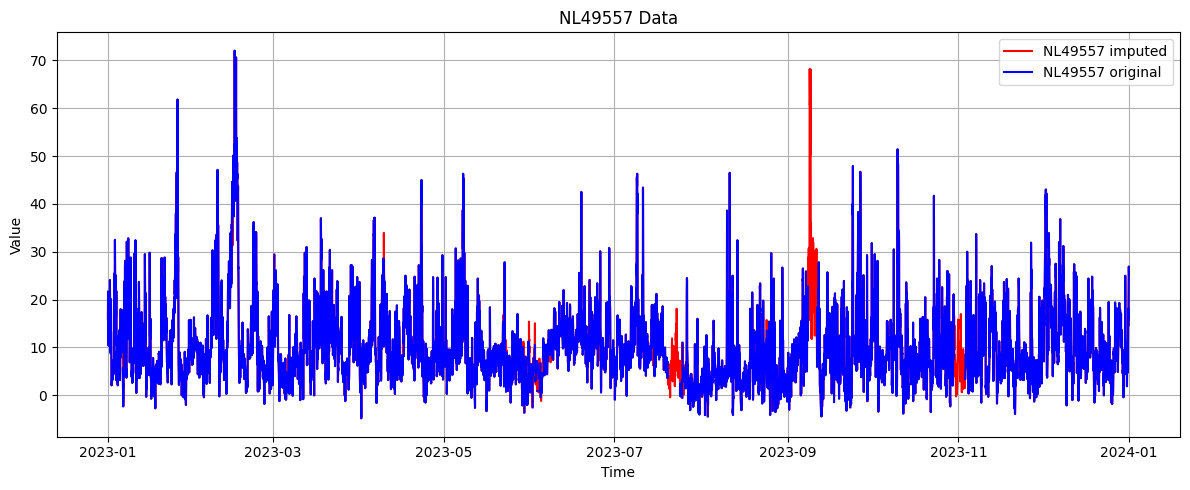

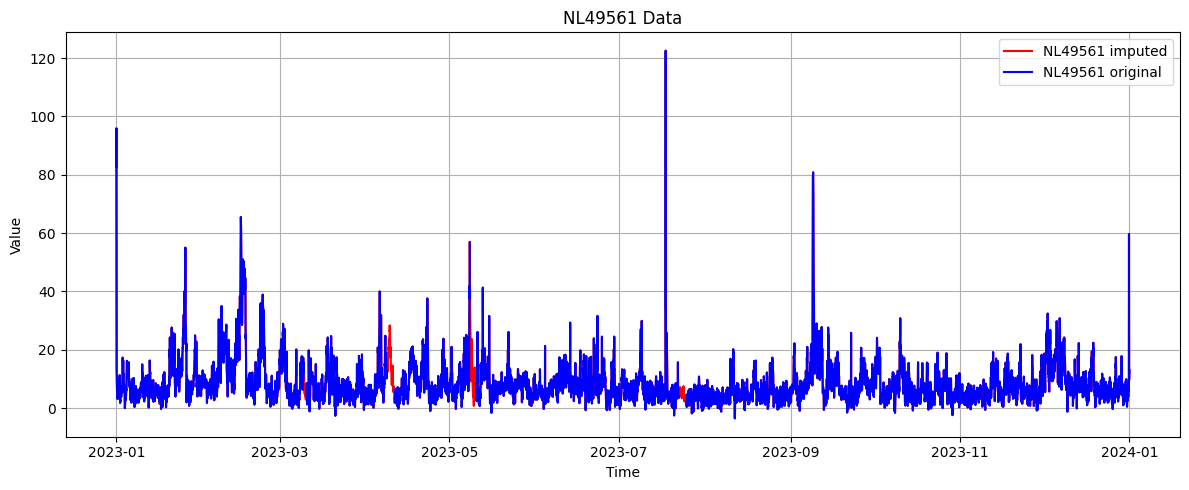

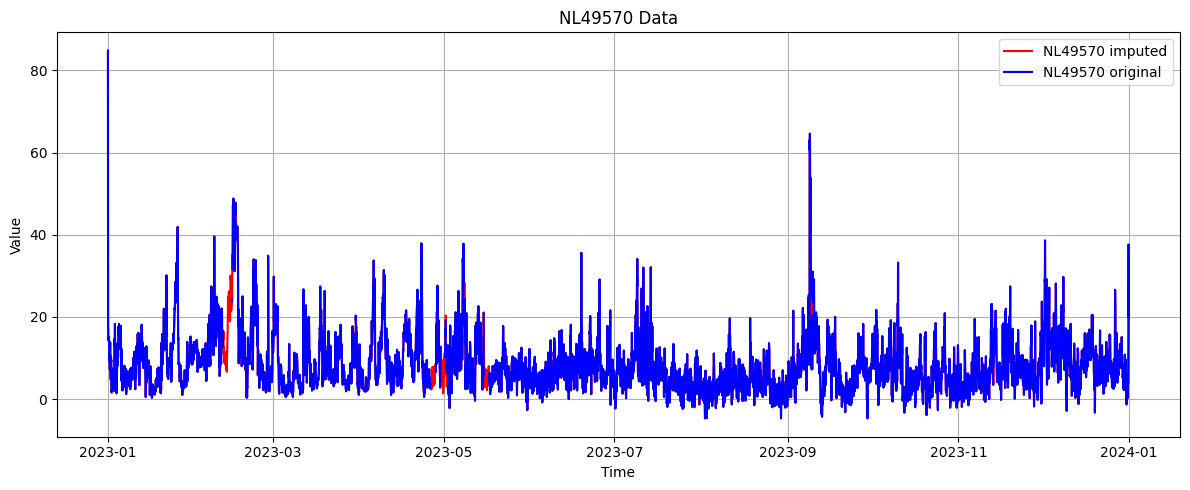

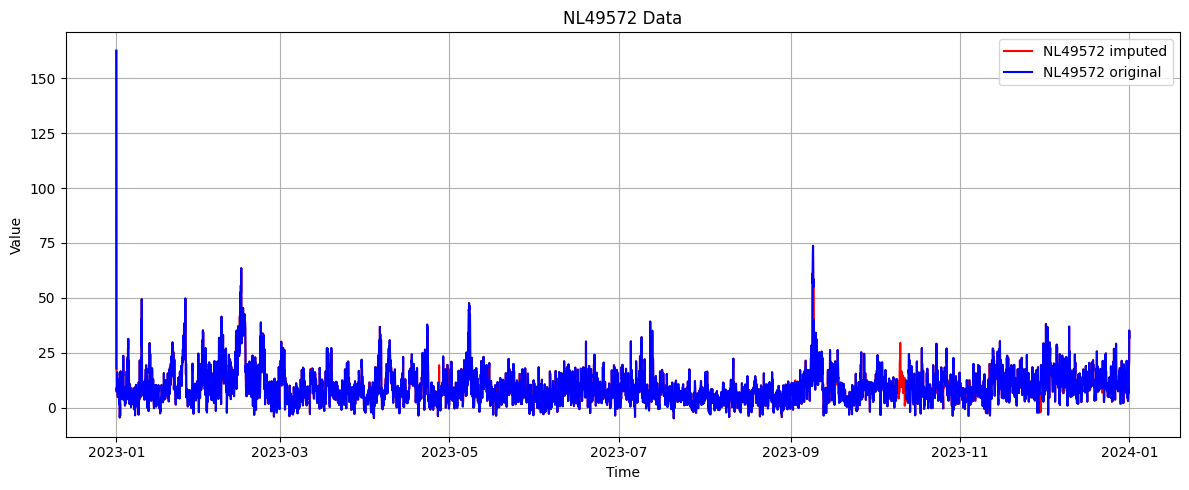

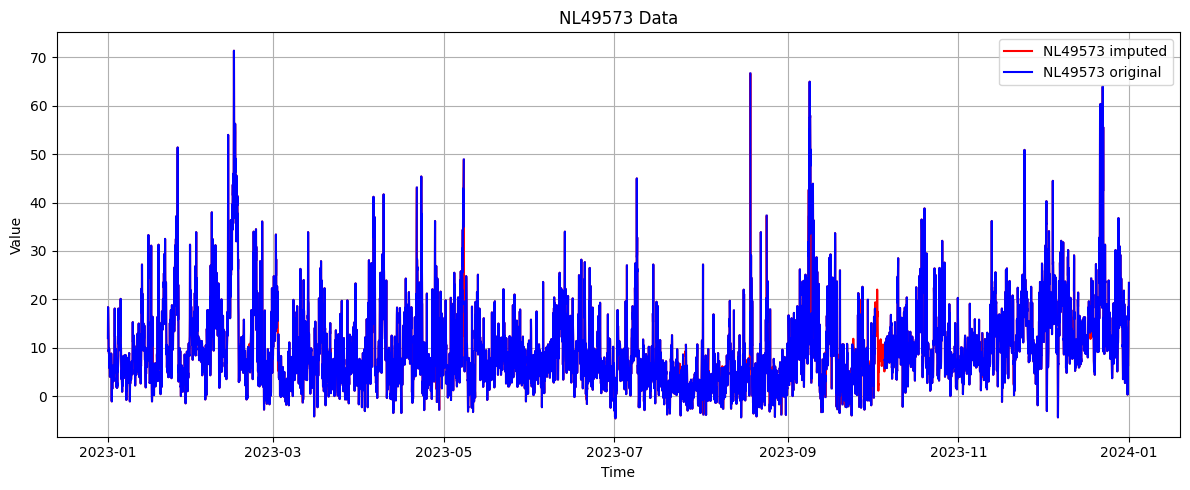

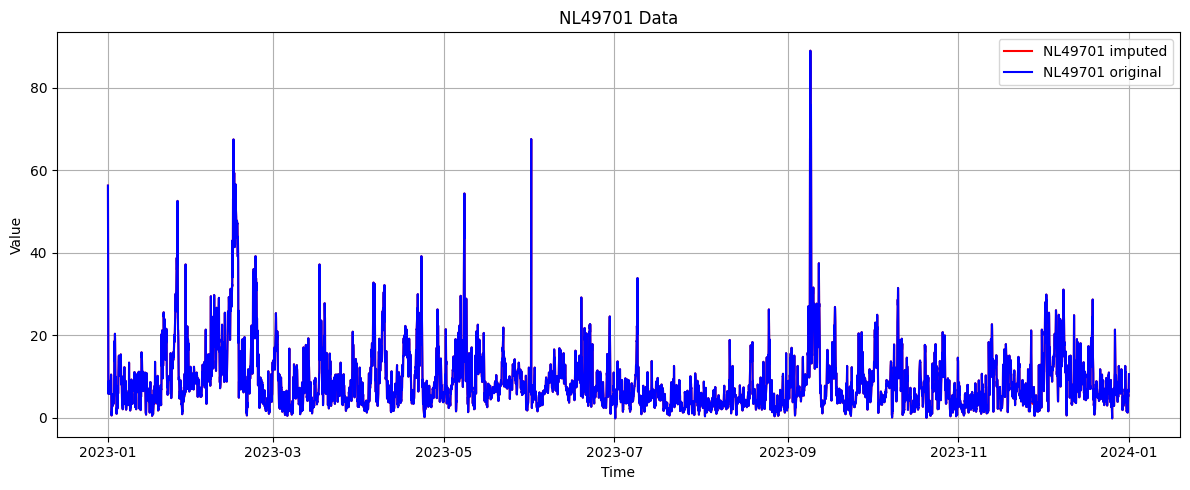

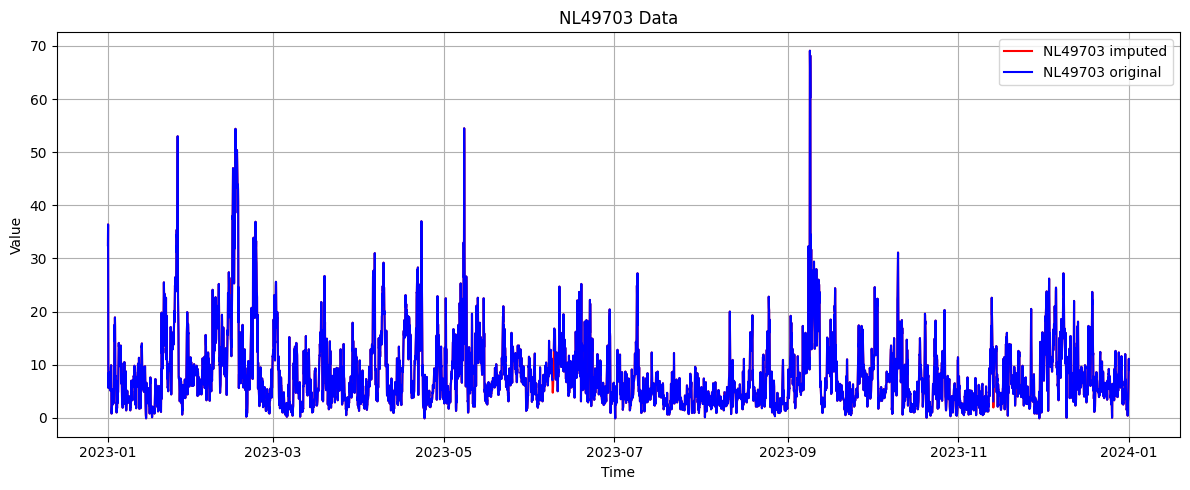

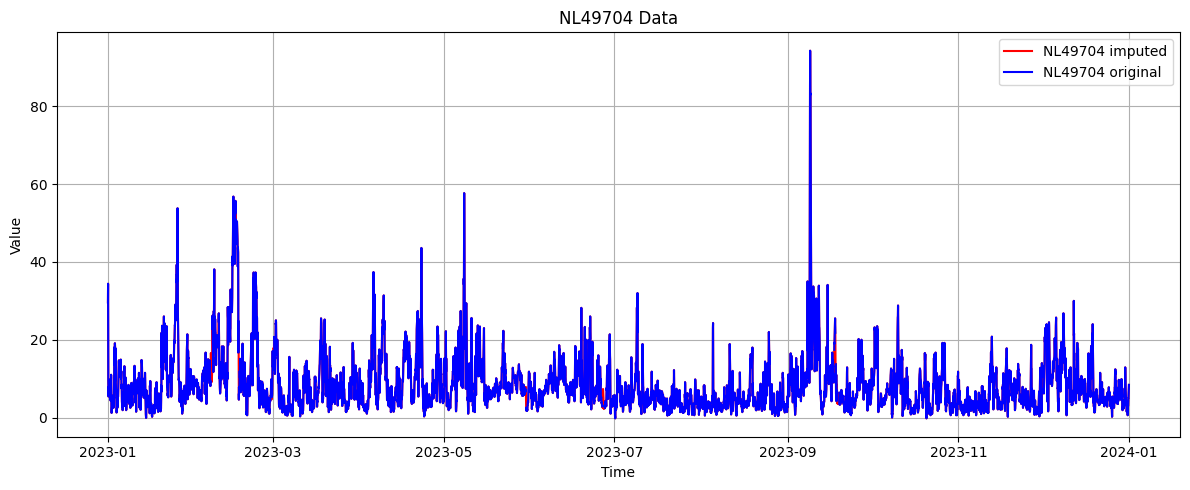

In [11]:
for station in stations:
    X = df_imputed['Begindatumtijd']
    y1 = df[station]
    y2 = df_imputed[station]
    
    plt.figure(figsize=(12, 5)) 
    plt.plot(X, y2, label=f'{station} imputed', color='red')
    
    plt.plot(X, y1, label=f'{station} original', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{station} Data')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

## PCA

we willen een PCA uitvoeren dit doen we zodat we de data uit verschillende meetstations kunnen combineren zonder informatie te verliezen. 

Station data standaliseren

In [40]:
df = df_imputed

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[stations])

In [14]:
data_scaled

array([[ 1.29208960e+01,  1.26911398e+01,  1.17397012e+01, ...,
         6.63556752e+00,  3.80044813e+00,  2.95513413e+00],
       [ 2.99970453e+00,  2.87263400e+00,  3.08450475e+00, ...,
         4.27622980e+00,  4.40455735e+00,  3.62289872e+00],
       [ 4.98908335e-01,  6.22280684e-01,  5.88057157e-01, ...,
         1.05133624e+00,  1.05872165e+00,  8.26634497e-01],
       ...,
       [ 3.89583911e-01,  1.93641957e-01, -9.62482751e-02, ...,
        -2.88879261e-01,  1.44812829e-01, -1.61100627e-01],
       [ 3.75918358e-01,  3.40986519e-01, -4.55589838e-02, ...,
        -7.94705886e-02,  4.85592391e-01, -3.58947666e-02],
       [ 4.30580570e-01,  9.43759729e-01,  6.00729480e-01, ...,
         2.55583288e-01,  1.60302809e-01,  5.84052038e-03]])

In [42]:
pca = PCA()
pca.fit(df[stations])

PCA()

Optimale aantal principal components zoeken

In [43]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


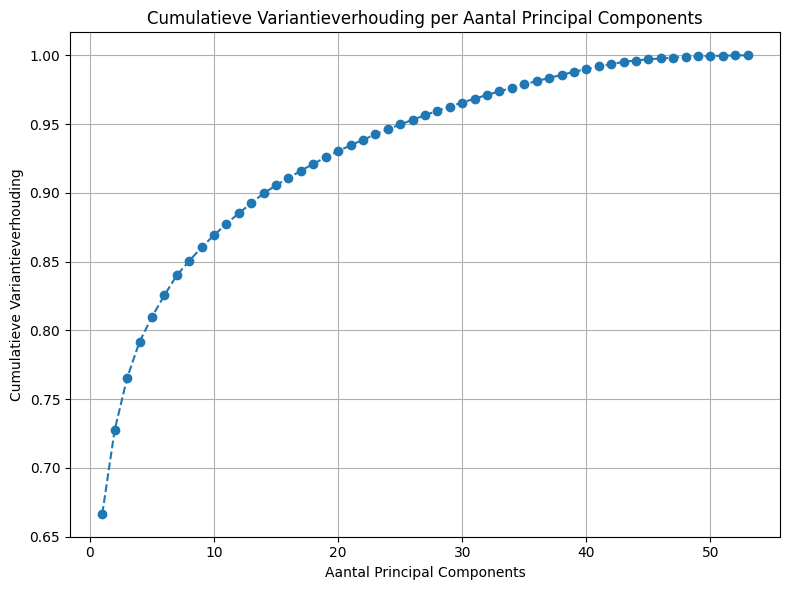

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Aantal Principal Components')
plt.ylabel('Cumulatieve Variantieverhouding')
plt.title('Cumulatieve Variantieverhouding per Aantal Principal Components')
plt.grid(True)
plt.tight_layout()
plt.show()


De meest optimale lijkt rond de 15 components. vanaf daar zit je in de 90% variantie.

In [48]:
pca = PCA(n_components=15)
principal_components = pca.fit_transform(data_scaled)

In [50]:
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(15)])

In [52]:
pca_df['Begindatumtijd'] = df['Begindatumtijd']

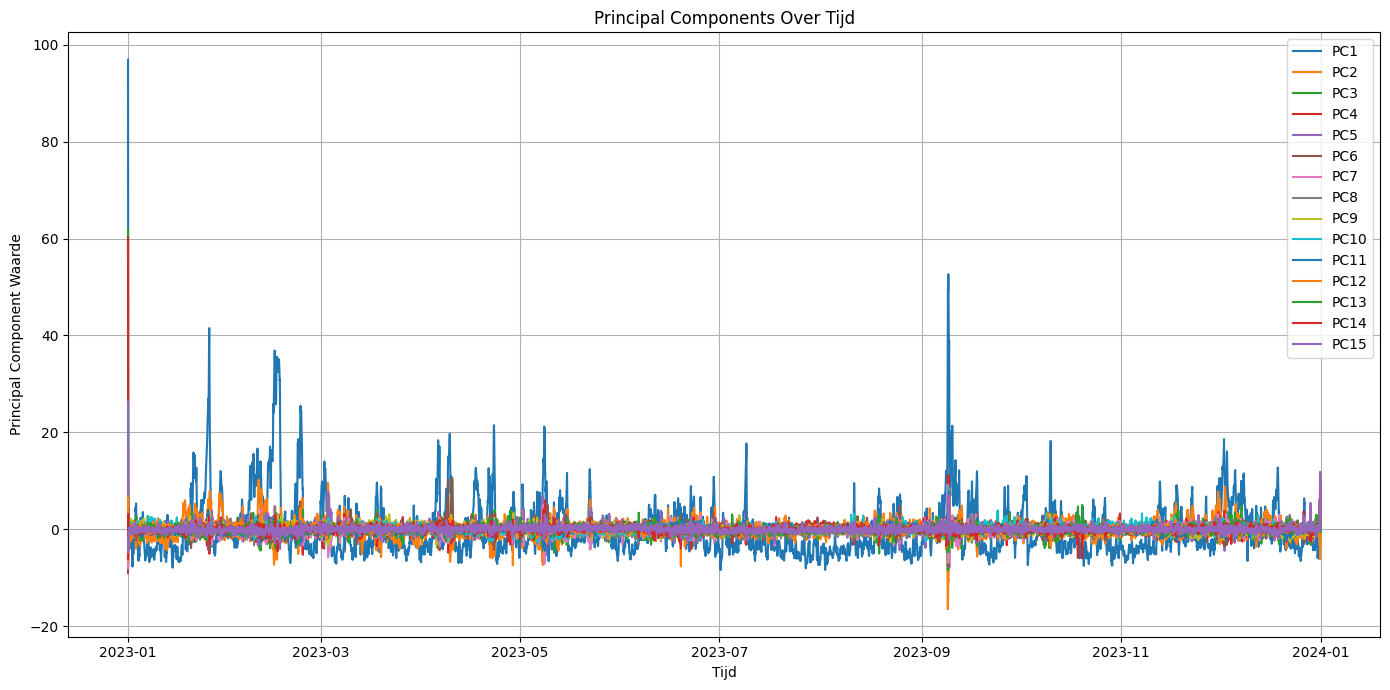

In [53]:
plt.figure(figsize=(14, 7))
for i in range(15):
    plt.plot(pca_df['Begindatumtijd'], pca_df[f'Principal Component {i+1}'], label=f'PC{i+1}')

plt.title('Principal Components Over Tijd')
plt.xlabel('Tijd')
plt.ylabel('Principal Component Waarde')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
